# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

## **Student Name: Amber Pan**
Project completed on Mar. 19, 2025

In [ ]:
# this code is not needed if using colab
# # Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Write your code here to read the data
# foodhub_order = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

#alernative code
#foodhub_order = pd.read_csv('//content//drive//MyDrive//Python Course//foodhub_order.csv')
foodhub_order = pd.read_csv('foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
foodhub_order.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
foodhub_order.shape

(1898, 9)

#### Observations:
There are **1898 rows** and **9 columns** present in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
foodhub_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*  4 columns are **integer datatype**: order_id, customer_id, food_preparation time, and delivery_time;
*  1 column is **float datatype**: cost_of_the_orser.
*  4 columns are **object datatype**: restaurant_name, cuisine_type, day_of_the week, and rating.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
foodhub_order.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

*   There are **no null vlaues** in the data.
*   From the first 5 rows, we can see that **rating** column contains some "Not given"  values.
*   If we need to calculate the average rating later, we will need to converted the rating data to numerical datatype
*   For now, we will treat rating as a categorical variable of **object** datatype.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
foodhub_order.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum, average, and maximum **time it takes** for food to be prepared once an order is placed are:
*   **Minimum: 20 minute**
*   **Average: 27 minutes**
*   **Maximum: **35 minutes**



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the number of orders for each rating valute
foodhub_order['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
**736** orders are **not rated**

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# get number of unique order IDs
foodhub_order['order_id'].nunique()

1898

Observation 6.1

There are **1898 unique order ID**s, this is the same as the total number of rows in the dataset.

#### Customer ID

In [ ]:
# get numbrt of unique customer IDs
foodhub_order['customer_id'].nunique()

1200

Observation 6.2.1

* There are **1200 uniques customers** in the dataset.
* We can tell that some customers placed mutiple orders, it will be interesting to see order count distribution by customer count

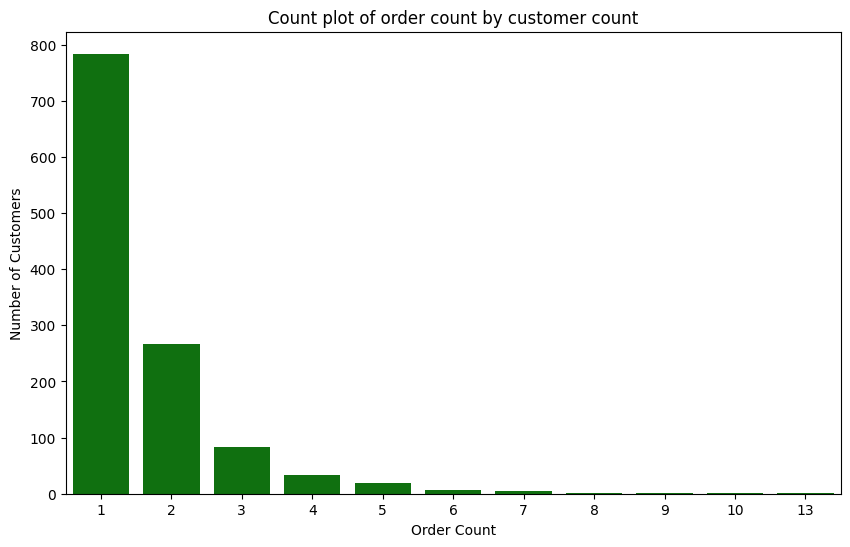

In [ ]:
# get order counts by customer
order_count_by_customer=foodhub_order['customer_id'].value_counts().reset_index()
order_count_by_customer.columns=['customer_id','order_count']
order_count_by_customer.head(20)

# count plot of orders count by customer count
plt.figure(figsize=(10, 6))
sns.countplot(data=order_count_by_customer, x='order_count',color='green');
plt.xlabel('Order Count')
plt.ylabel('Number of Customers')
plt.title('Count plot of order count by customer count')
plt.show()


Observation 6.2.2

* In the data set,** most customers placed 1 or 2 orders**, the largest number of orders a customer placed is 13.
* The bigger the number of orders, the fewer number of customers placed that many.

#### Restaurant name

In [ ]:
# get number of unique restaurant names
foodhub_order['restaurant_name'].nunique()

178

Observation 6.3.1

* There are **178 uniques restaurants** in data
* We can tell that some restaurants received mutiple orders, it will be interesting to see order counts distribution by restaurant

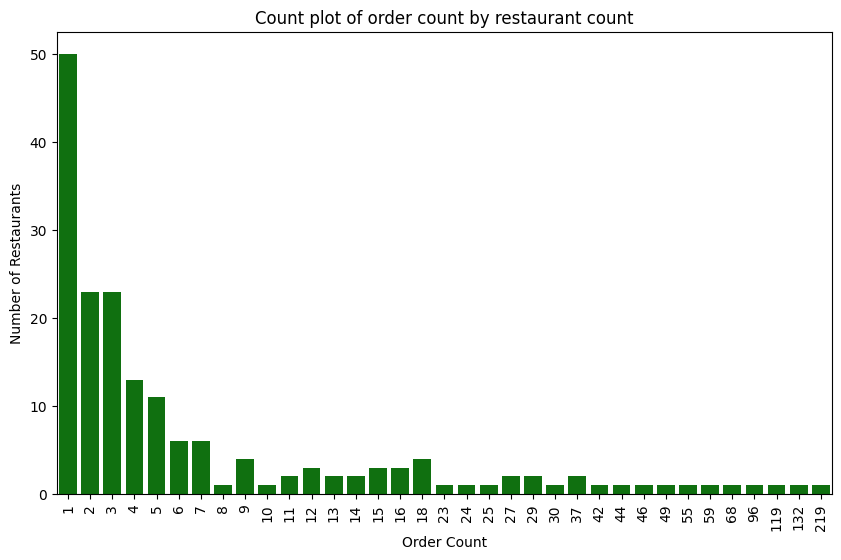

In [ ]:
# get order counts by each restaurant
order_count_by_restaurant=foodhub_order['restaurant_name'].value_counts().reset_index()
order_count_by_restaurant.columns=['restaurant_name','order_count']
order_count_by_restaurant.head(20)

# generate count plot of order count by restaurant count
plt.figure(figsize=(10, 6))
sns.countplot(data=order_count_by_restaurant, x='order_count',color='green');
plt.xlabel('Order Count')
plt.xticks(rotation=90)
plt.ylabel('Number of Restaurants')
plt.title('Count plot of order count by restaurant count')
plt.show()

Observation 6.3.2

* **50 restaurants received only 1 orders**
* The largest number of order a restaurant received is 219
* The bigger the number of orders, the fewer number of restaurants received that many.

#### Cuisine type

In [ ]:
## get unique cuisine types
foodhub_order['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

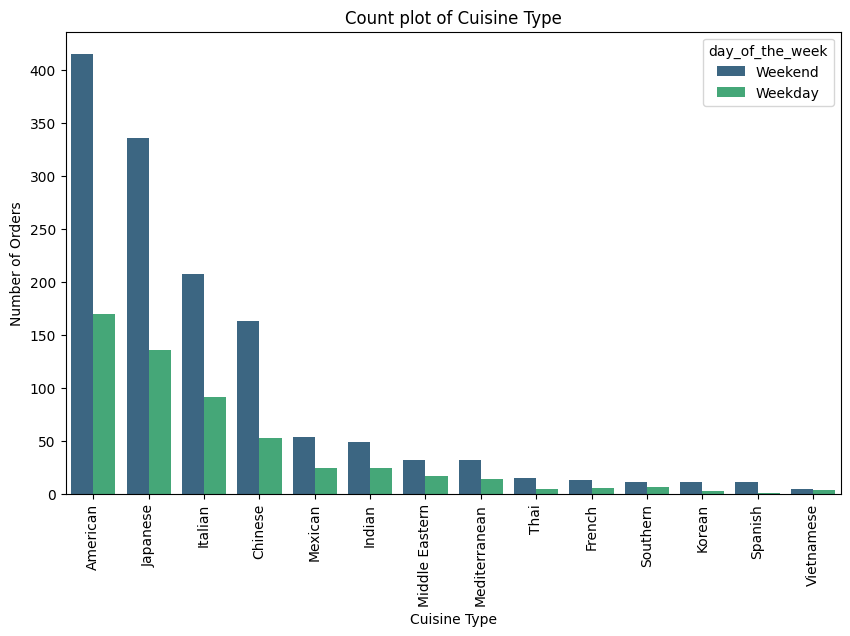

In [ ]:
# Count plot of cuisine types
plt.figure(figsize=(10, 6))
order_counts = foodhub_order['cuisine_type'].value_counts().index
sns.countplot(data=foodhub_order,x='cuisine_type', order=order_counts, hue='day_of_the_week', palette='viridis'); # added different hue dimension to fix warning
plt.xticks(rotation=90);
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Count plot of Cuisine Type')
plt.show()

Observation 6.4.1

Four cuisine types are by far the **most popular: American, Japanese, Italian, and Chinese**, they received the vast majority of orders.

Across the board for all cuisine types, more orders are placed on weekends than on weekdays

In [ ]:
# further explore order count by cuisines types
foodhub_order['cuisine_type'].value_counts(normalize=True)

,proportion
cuisine_type,
American,0.307692
Japanese,0.247629
Italian,0.157007
Chinese,0.113277
Mexican,0.040569
Indian,0.038462
Middle Eastern,0.025817
Mediterranean,0.024236
Thai,0.010011


In [ ]:
#Calculate percentage of orders placed with the top four most popular cuisines: American, Japanese, Italian, Chinese
print( "{:.2f}".format(foodhub_order['cuisine_type'].value_counts(normalize=True).head(4).sum()*100),'%')

82.56 %


Observation 6.4.2

**82.56%** of all orders are from the **top 4 cuisines**

#### Cost of the order

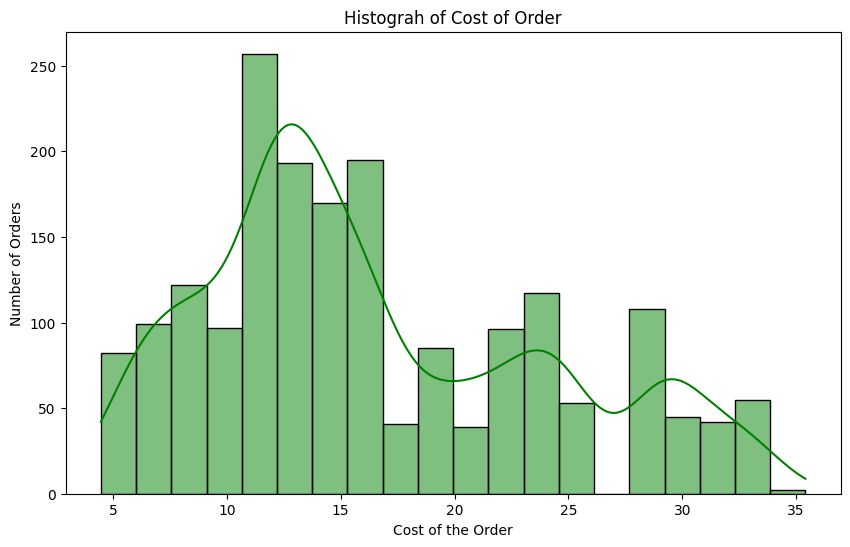

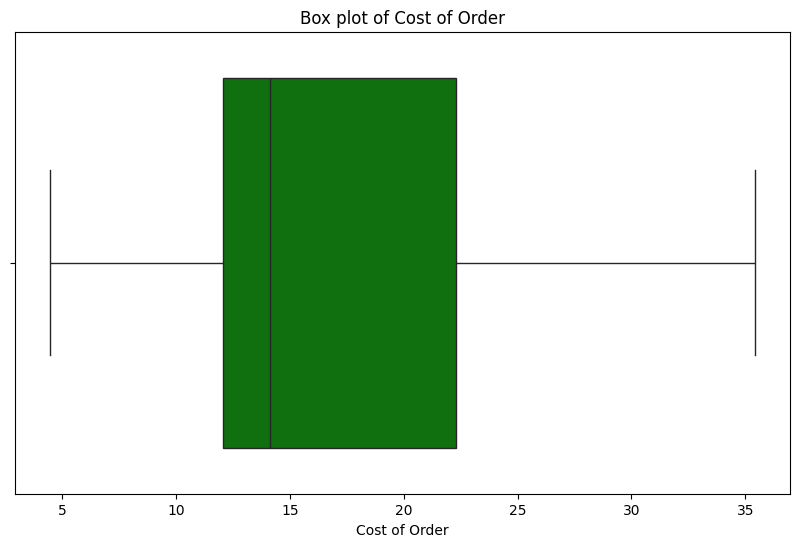

In [ ]:
# Histogram of Cost of order
plt.figure(figsize=(10, 6))
sns.histplot(foodhub_order['cost_of_the_order'], bins = 20, kde = True, color= 'green');
plt.xlabel('Cost of the Order')
plt.ylabel('Number of Orders')
plt.title('Histograh of Cost of Order')
plt.show()

# Boxplot of Cost of Order
plt.figure(figsize=(10, 6))
sns.boxplot(foodhub_order['cost_of_the_order'],color='green',orient='h');
plt.xlabel('Cost of Order')
plt.title('Box plot of Cost of Order')
plt.show()

Observation 6.5.1

The distributiuon of the cost of orders in the dataset shows $10-17 as the most popular range, and is right skewed.

50% of all cost of orders in the dataset fall between $12-22, minimum is 5, maximum 35, with no outliers

#### Day of the week

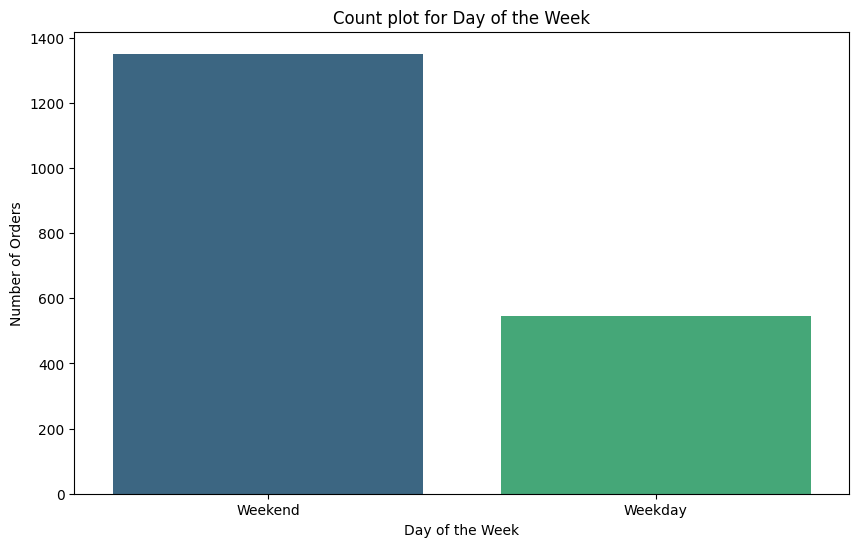

In [ ]:
# countplot for day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=foodhub_order,x='day_of_the_week',hue='day_of_the_week', palette='viridis');
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Count plot for Day of the Week')
plt.show()

Observation 6.6.1

The **majority of orders are placed on weekends**.

In [ ]:
#calculate percentage of orders placed on weekend:
foodhub_order['day_of_the_week'].value_counts(normalize=True)

,proportion
day_of_the_week,
Weekend,0.711802
Weekday,0.288198


Observation 6.6.2

**Weekend orders account for over 71%** of all orders placed, while weekdays have less than 30%

#### Rating

In [19]:
# First sort rating for better graph
df_sorted = foodhub_order.sort_values(by='rating',ascending=True)

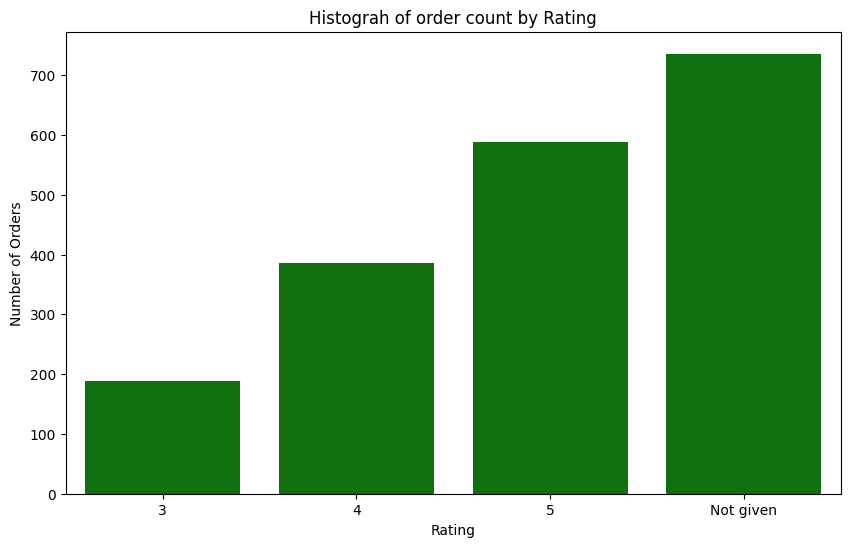

In [ ]:
# Count plot for rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sorted,x='rating', color='green')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.title('Histograh of order count by Rating')
plt.show()

Observation 6.7.1

The number of orders that have not been given ratings is the highest compared to those with any given rating, followed by those with ratings of 5, 4, and 3

In [ ]:
#calculate the percentage of orders that have not been given a rating
foodhub_order['rating'].value_counts(normalize=True)

,proportion
rating,
Not given,0.387777
5,0.309800
4,0.203372
3,0.099052


Observation 6.7.2

The orders that **have not been given a rating** account for **38.78%**of all orders

#### Food Preparation time

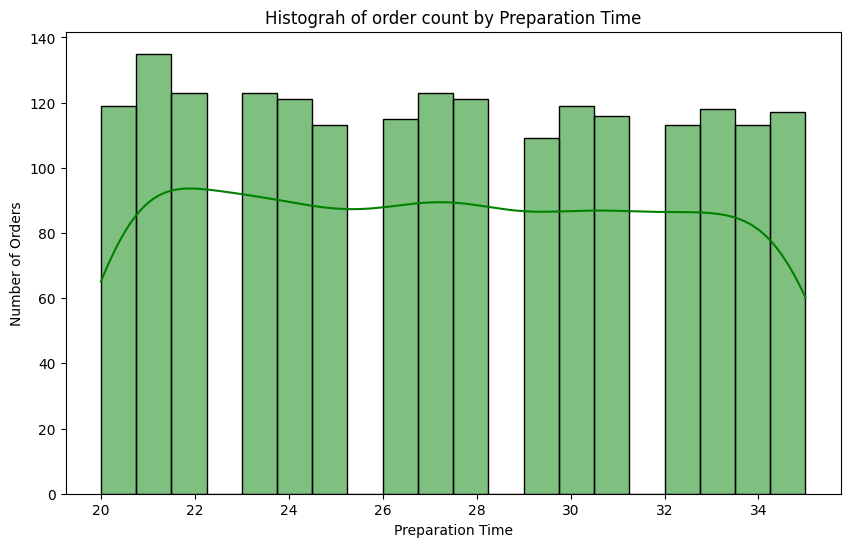

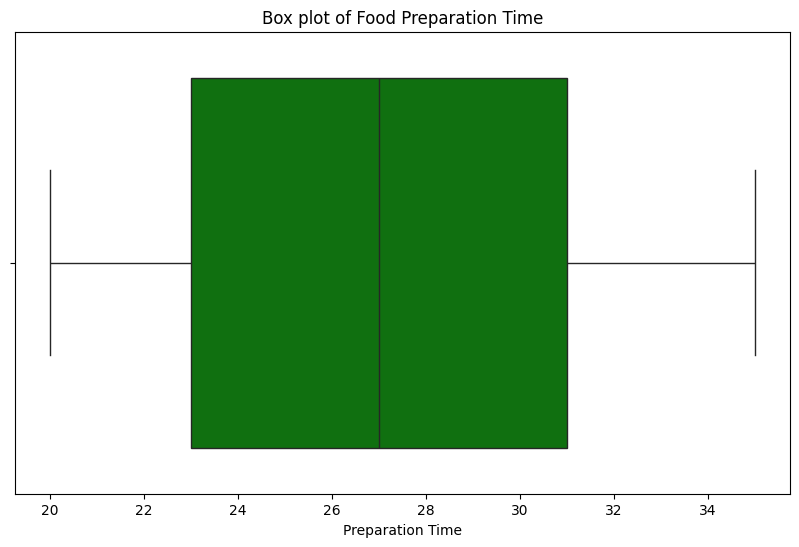

In [ ]:
# Histogram Food Preparation time
plt.figure(figsize=(10, 6))
sns.histplot(foodhub_order['food_preparation_time'], kde=True, bins = 20, color='green');
plt.xlabel('Preparation Time')
plt.ylabel('Number of Orders')
plt.title('Histograh of order count by Preparation Time')

# Boxplot for food preparation time
plt.figure(figsize=(10, 6))
sns.boxplot(foodhub_order['food_preparation_time'],color='green',orient='h');
plt.xlabel('Preparation Time')
plt.title('Box plot of Food Preparation Time')
plt.show()

Observation 6.8

Food preparation times are spread out pretty evenly between 20 and 35 minutes.

no outliers

#### Delivery time

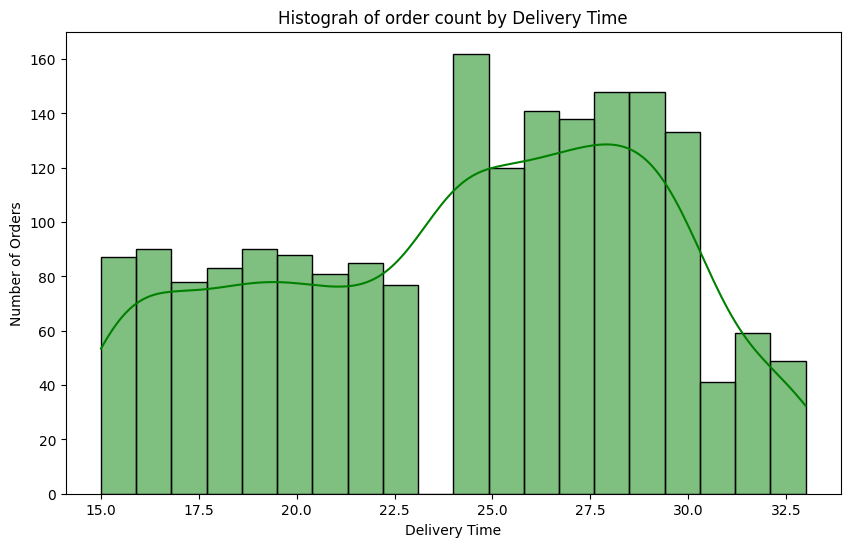

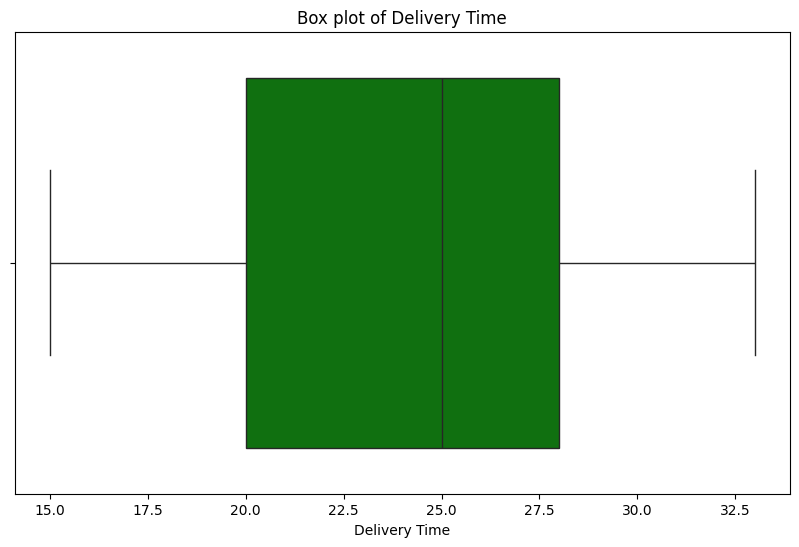

In [ ]:
# Histogram for Deivery Time
plt.figure(figsize=(10, 6))
sns.histplot(foodhub_order['delivery_time'], kde=  True, bins = 20,color='green');
plt.xlabel('Delivery Time')
plt.ylabel('Number of Orders')
plt.title('Histograh of order count by Delivery Time')

#Boxplot for delviery time
plt.figure(figsize=(10, 6))
sns.boxplot(foodhub_order['delivery_time'], color='green', orient='h');
plt.xlabel('Delivery Time')
plt.title('Box plot of Delivery Time')
plt.show()

Observation 6.9

Delivery times distribution is left skewed with 24-30 minutes being the most frequent time range.

ranges between 15 and 33 minutes, no outliers

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants
top_5 = foodhub_order['restaurant_name'].value_counts().reset_index().head(5)
top_5.columns = ['restaurant_name', 'number_of_orders']
top_5

,restaurant_name,number_of_orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


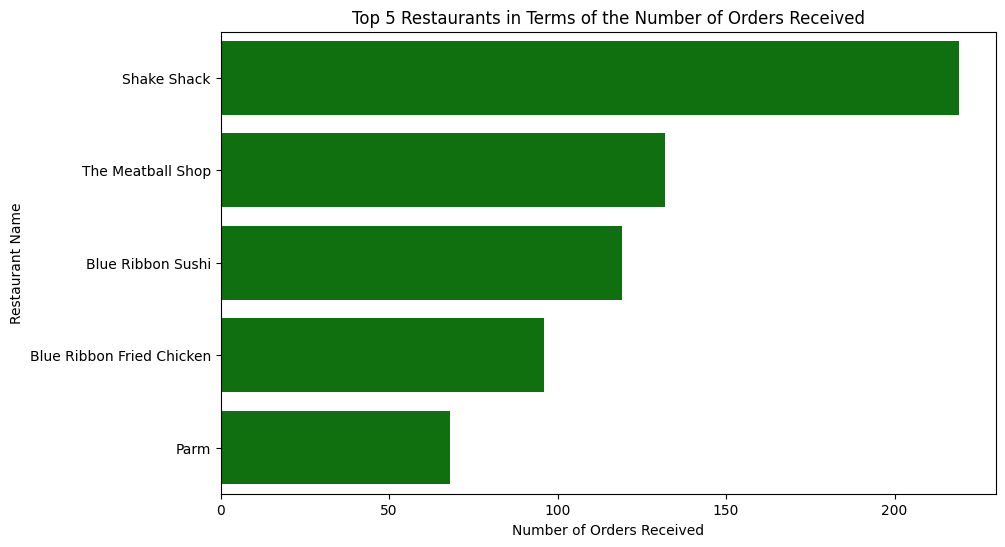

In [ ]:
#Bar graph of top 5 restaurants
plt.figure(figsize=(10, 6))
sns.barplot(data =top_5, x = 'number_of_orders', y='restaurant_name', color='green',orient='h')
plt.ylabel('Restaurant Name')
plt.xlabel('Number of Orders Received')
plt.title('Top 5 Restaurants in Terms of the Number of Orders Received')
plt.show()


#### Observations:
The **top 5 restaurants** in terms of the number of orders received are:

1. Shake Shack	219
2. The Meatball Shop	132
3. Blue Ribbon Sushi	119
4. Blue Ribbon Fried Chicken	96
5. Parm 68




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

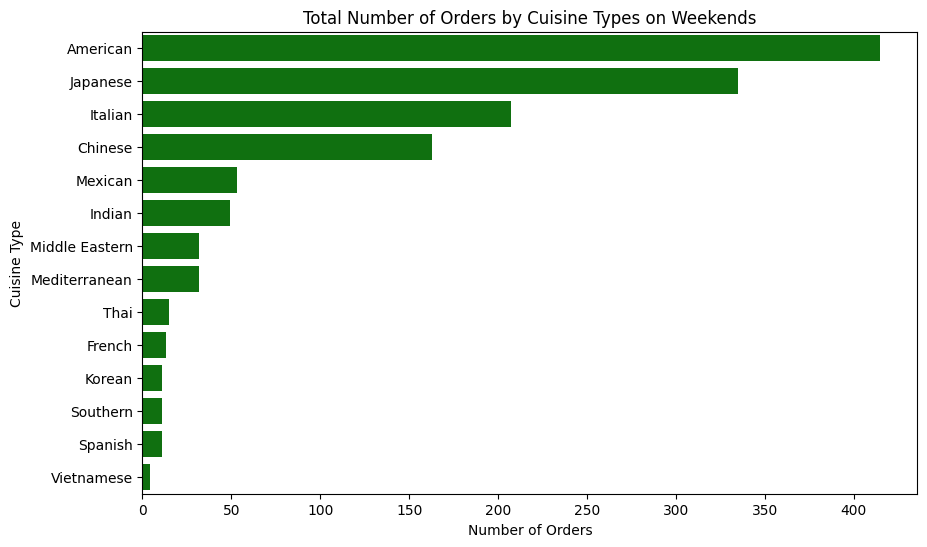

In [ ]:
# Identify the cuisine that received the highest number of orders on weekends

# Calculate the total number of orders by cuisine type
# foodhub_order.groupby(['day_of_the_week'])['cuisine_type'].value_counts()
cuisine_weekend=foodhub_order[foodhub_order['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().reset_index()
cuisine_weekend

# generate bar graph of weekend order counts by cuisine
plt.figure(figsize=(10, 6))
sns.barplot(data=cuisine_weekend, x='count', y='cuisine_type', color='green',orient='h')
# plt.xticks(rotation=90)
plt.ylabel('Cuisine Type')
plt.xlabel('Number of Orders')
plt.title('Total Number of Orders by Cuisine Types on Weekends')
plt.show()


#### Observations:
The most popular cuisine on weekends is **American**

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
order_over_20 = foodhub_order[foodhub_order['cost_of_the_order']>20]
percentage =  order_over_20.shape[0]/foodhub_order.shape[0] * 100 # .shape[0] = .value_counts().sum()

print('Percentage of orders cost more than 20 dollars:', round(percentage, 2), '%')

# # alternatively, can use the following code:
# order_over_20 = foodhub_order[foodhub_order['cost_of_the_order']>20].value_counts().sum()/foodhub_order.shape[0]*100
# print(f'{order_over_20:.2f}% of the orders cost more than 20 dollars')

Percentage of orders cost more than 20 dollars: 29.24 %


#### Observations:
**%29.24** of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

The answer to this question can also be found under Question #4 Statistical Summary. Here we check again focusing on delivery time

In [ ]:
# Write the code here
mean_delivery = foodhub_order['delivery_time'].mean()
print('The mean order delivery time is', round(mean_delivery),'minutes')


The mean order delivery time is 24 minutes


#### Observations:
The mean order delivery time is** 24 minutes**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [16]:
# Find IDs of the top 3 most frequent customers
top_3_customer = foodhub_order['customer_id'].value_counts().reset_index().head(3)
# Rename the columns for better clarity
top_3_customer.columns = ['customer ID', 'number of orders']
top_3_customer

,customer ID,number of orders
0,52832,13
1,47440,10
2,83287,9


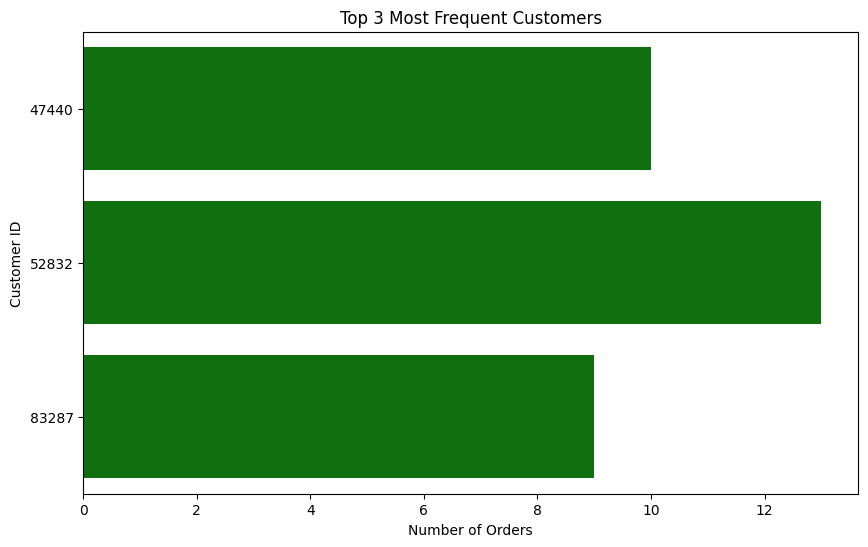

In [17]:
# Sort the DataFrame by 'number of orders' in descending order
top_3_customer = top_3_customer.sort_values(by='number of orders', ascending=False) #this doesn't seem to affect the output of the graph!?

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_customer, y='customer ID', x='number of orders', color='green', orient='h')
plt.ylabel('Customer ID')
plt.xlabel('Number of Orders')
plt.title('Top 3 Most Frequent Customers')
plt.show()

#### Observations:

The **top 3 most frequent customers** are:

```
	customer_id	number of orders
0	52832	      13
1	47440	      10
2	83287	       9

```

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Overview of relationship betweeen all the numerical variables

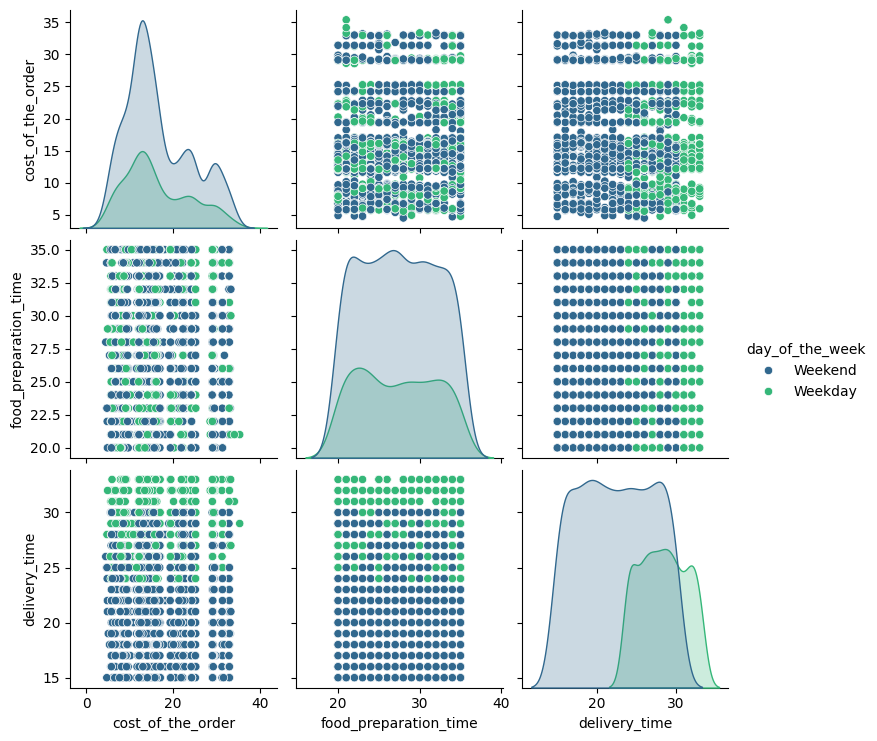

In [ ]:
# Pair plot for all numerical variables, create column list for numerical variables, exlude order id, customer id

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

sns.pairplot(data=foodhub_order,hue='day_of_the_week', vars =col_list, palette='viridis');

Observation 12.1

*   **no obvious correlation** between any two numerical variables.
*   Weekend delivery time are generally shorter than weekdays
* Cost of order show multiple ranges with gaps in between


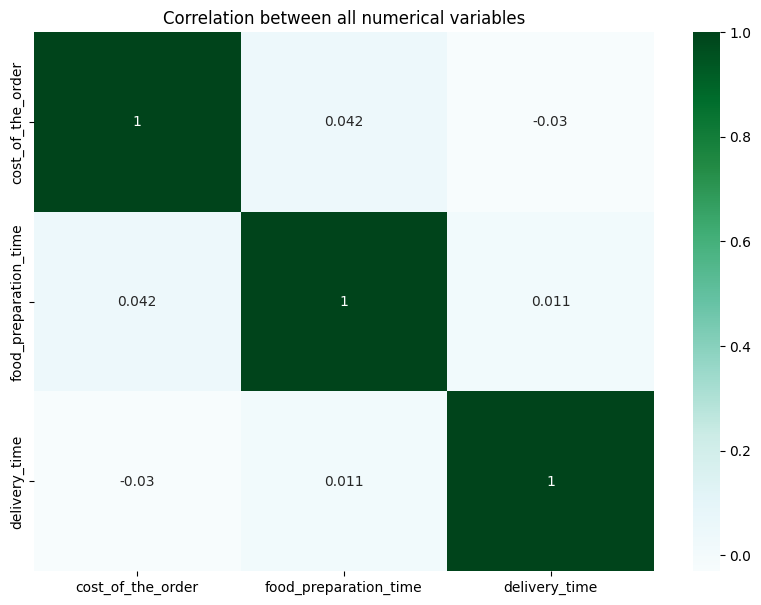

In [ ]:
#Heat map to show the actual correlation
plt.figure(figsize=(10, 7))
sns.heatmap(foodhub_order[col_list].corr(numeric_only=True),annot=True, cmap='BuGn');
plt.title('Correlation between all numerical variables')
plt.show()

Observation 12.2

Confirms there is no strong correlation between numerical variables including cost of order, food preparation time, and delivery time.

Can further examine relationship with categorical variables.

#### Cuisine Type vs. Cost of Order

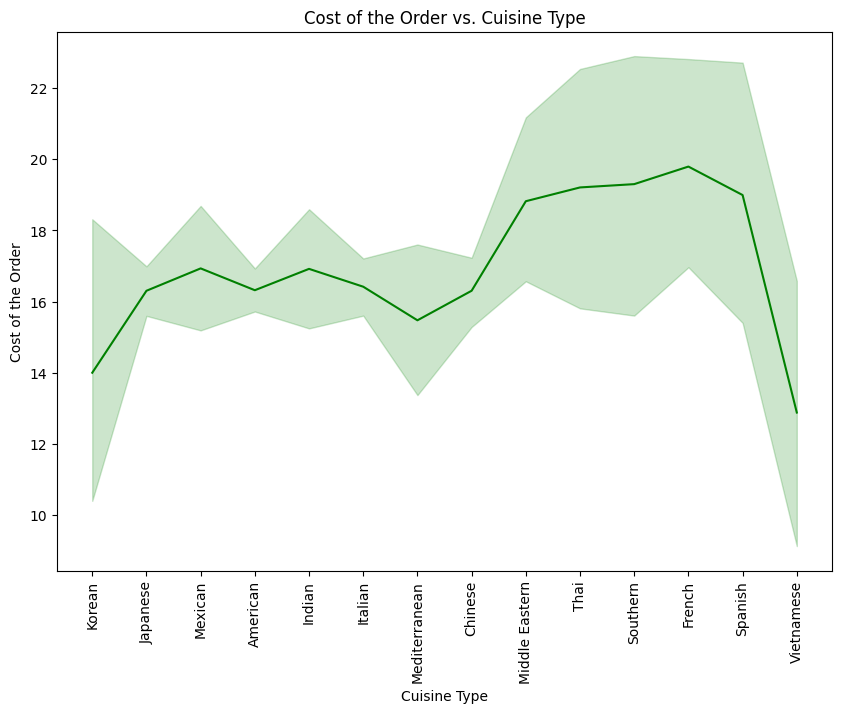

In [ ]:
#line plot for cost of the order vs. cuisine type
plt.figure(figsize=(10, 7))
sns.lineplot(data=foodhub_order,x='cuisine_type',y='cost_of_the_order',color='green');
plt.xticks(rotation=90);
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Cost of the Order vs. Cuisine Type')
plt.show()

Observation 12.3

*   Orders for popular cuisines tend to stay within a price range (approximately $14 - 18);
*   while orders for less popular cuisines are more likely to fall outside this range, either higher or lower.

#### Cuisine Type vs. day of the week

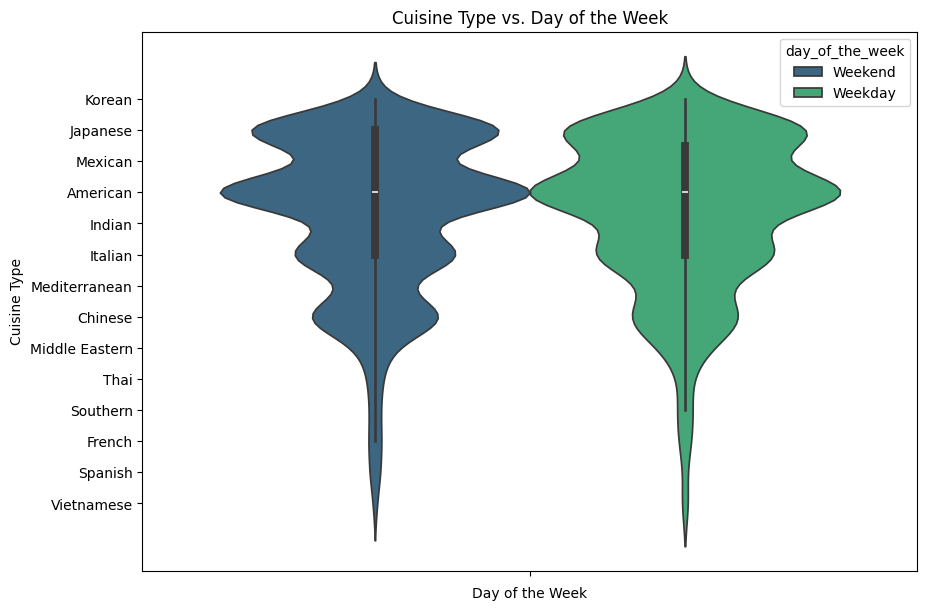

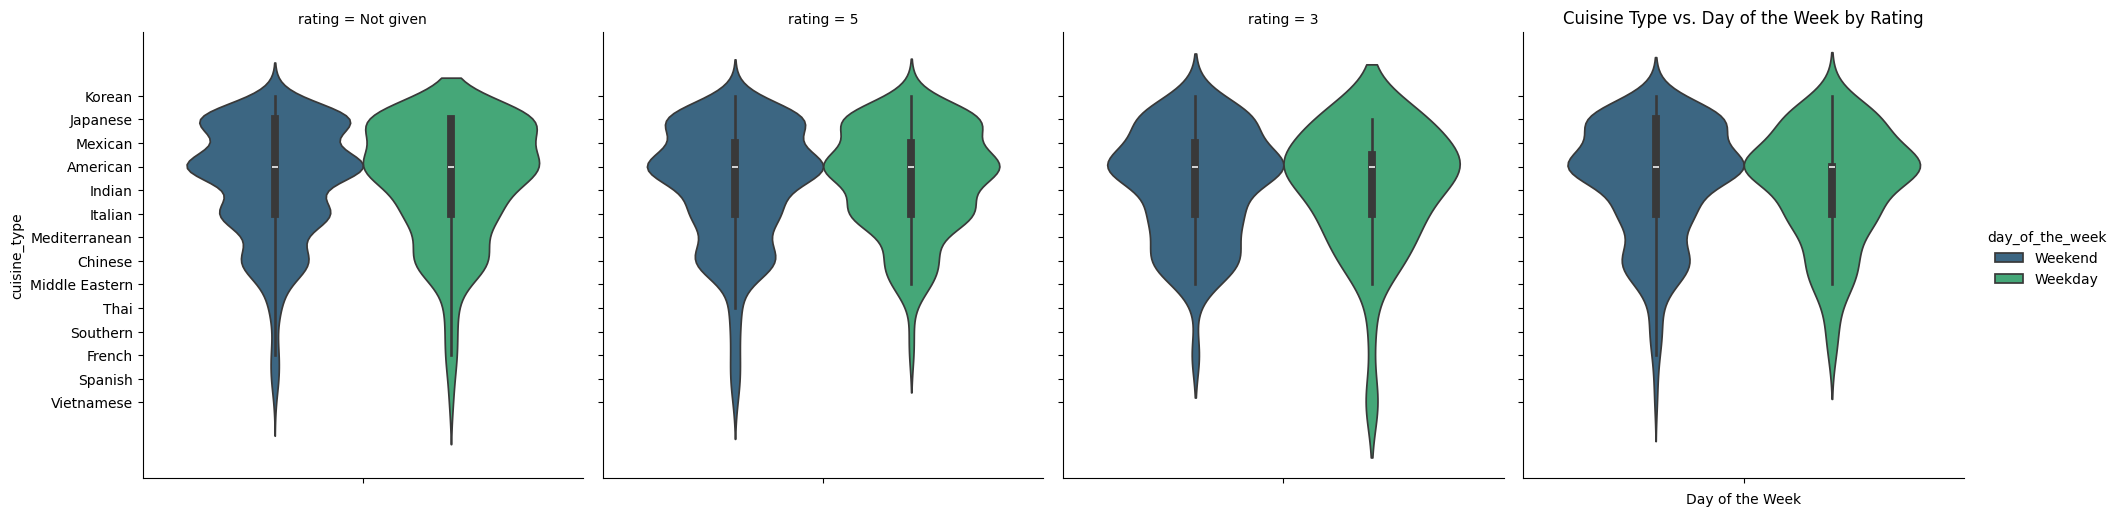

In [ ]:
# violin plot for cuisine type vs. day of the week
plt.figure(figsize=(10,7))
sns.violinplot(data=foodhub_order,y='cuisine_type',hue='day_of_the_week',  palette='viridis');
plt.ylabel('Cuisine Type')
plt.xlabel('Day of the Week')
plt.title('Cuisine Type vs. Day of the Week')
plt.show()

# violin catplot for cuisine type vs. day of the week break down by rating
sns.catplot(data=foodhub_order,y='cuisine_type',hue='day_of_the_week', kind ='violin',col ='rating', palette='viridis');
plt.ylabel('Cuisine Type')
plt.xlabel('Day of the Week')
plt.title('Cuisine Type vs. Day of the Week by Rating')
plt.show()


Observation 12.4

*   Popularity of cuisines have similar pattern on weekends and weekdays, on weekends the pattern is stronger, eg, the popular ones are relatively even more popular on the weekends

#### Cuisine Type vs. delivery time

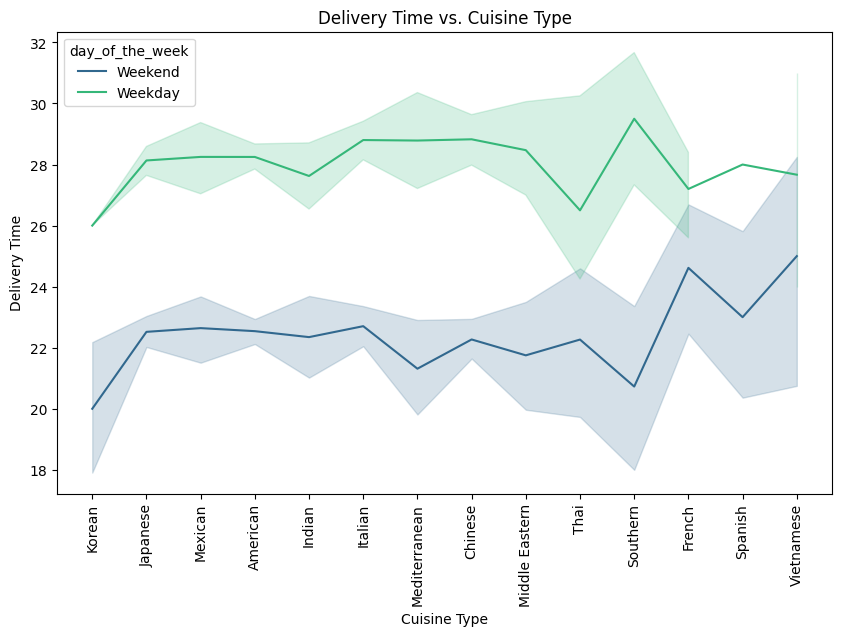

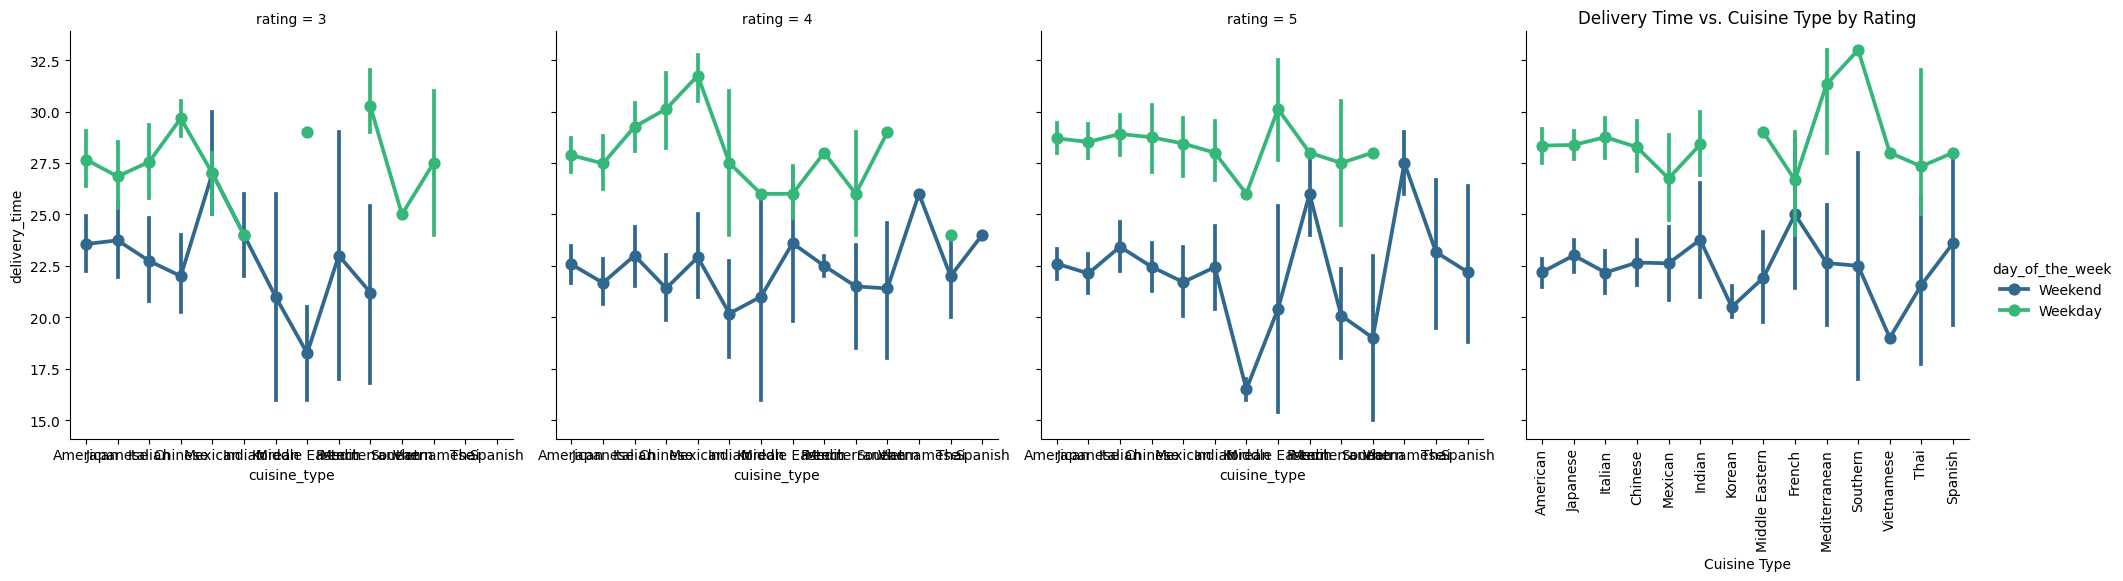

In [ ]:
# generate line plot for delivery time vs cuisine
plt.figure(figsize=(10,6))
sns.lineplot(data=foodhub_order,x='cuisine_type',hue='day_of_the_week', y='delivery_time', palette='viridis');
plt.xticks(rotation=90);
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.title('Delivery Time vs. Cuisine Type')
plt.show()

# point cat plot for cuising time vs. delivery time break down by rating
sns.catplot(data=df_sorted,x='cuisine_type',hue='day_of_the_week', y='delivery_time', kind='point', col='rating',palette='viridis');
plt.xticks(rotation=90);
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.title('Delivery Time vs. Cuisine Type by Rating')
plt.show()




Observation 12.5

*   All cuisine types have shorter delivery time on weekends than weekdays.
  
*   Korean restaurants have shorter delivery time than other cuisines
*   Southern restaurants have shorter delivery time than most of the other restaurants but longer delivery time than others on weekdays
* French, Spanish, Vetnamnese restaurants have longer delivery time than others on weekends
*Thai restaurants have shorter delivery time than others on weekdays





#### Cost of order vs. rating

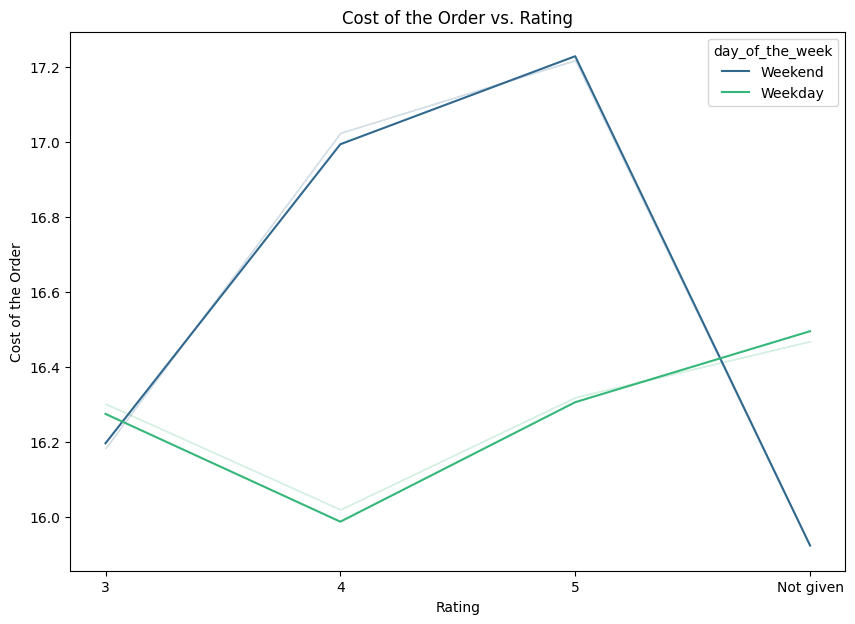

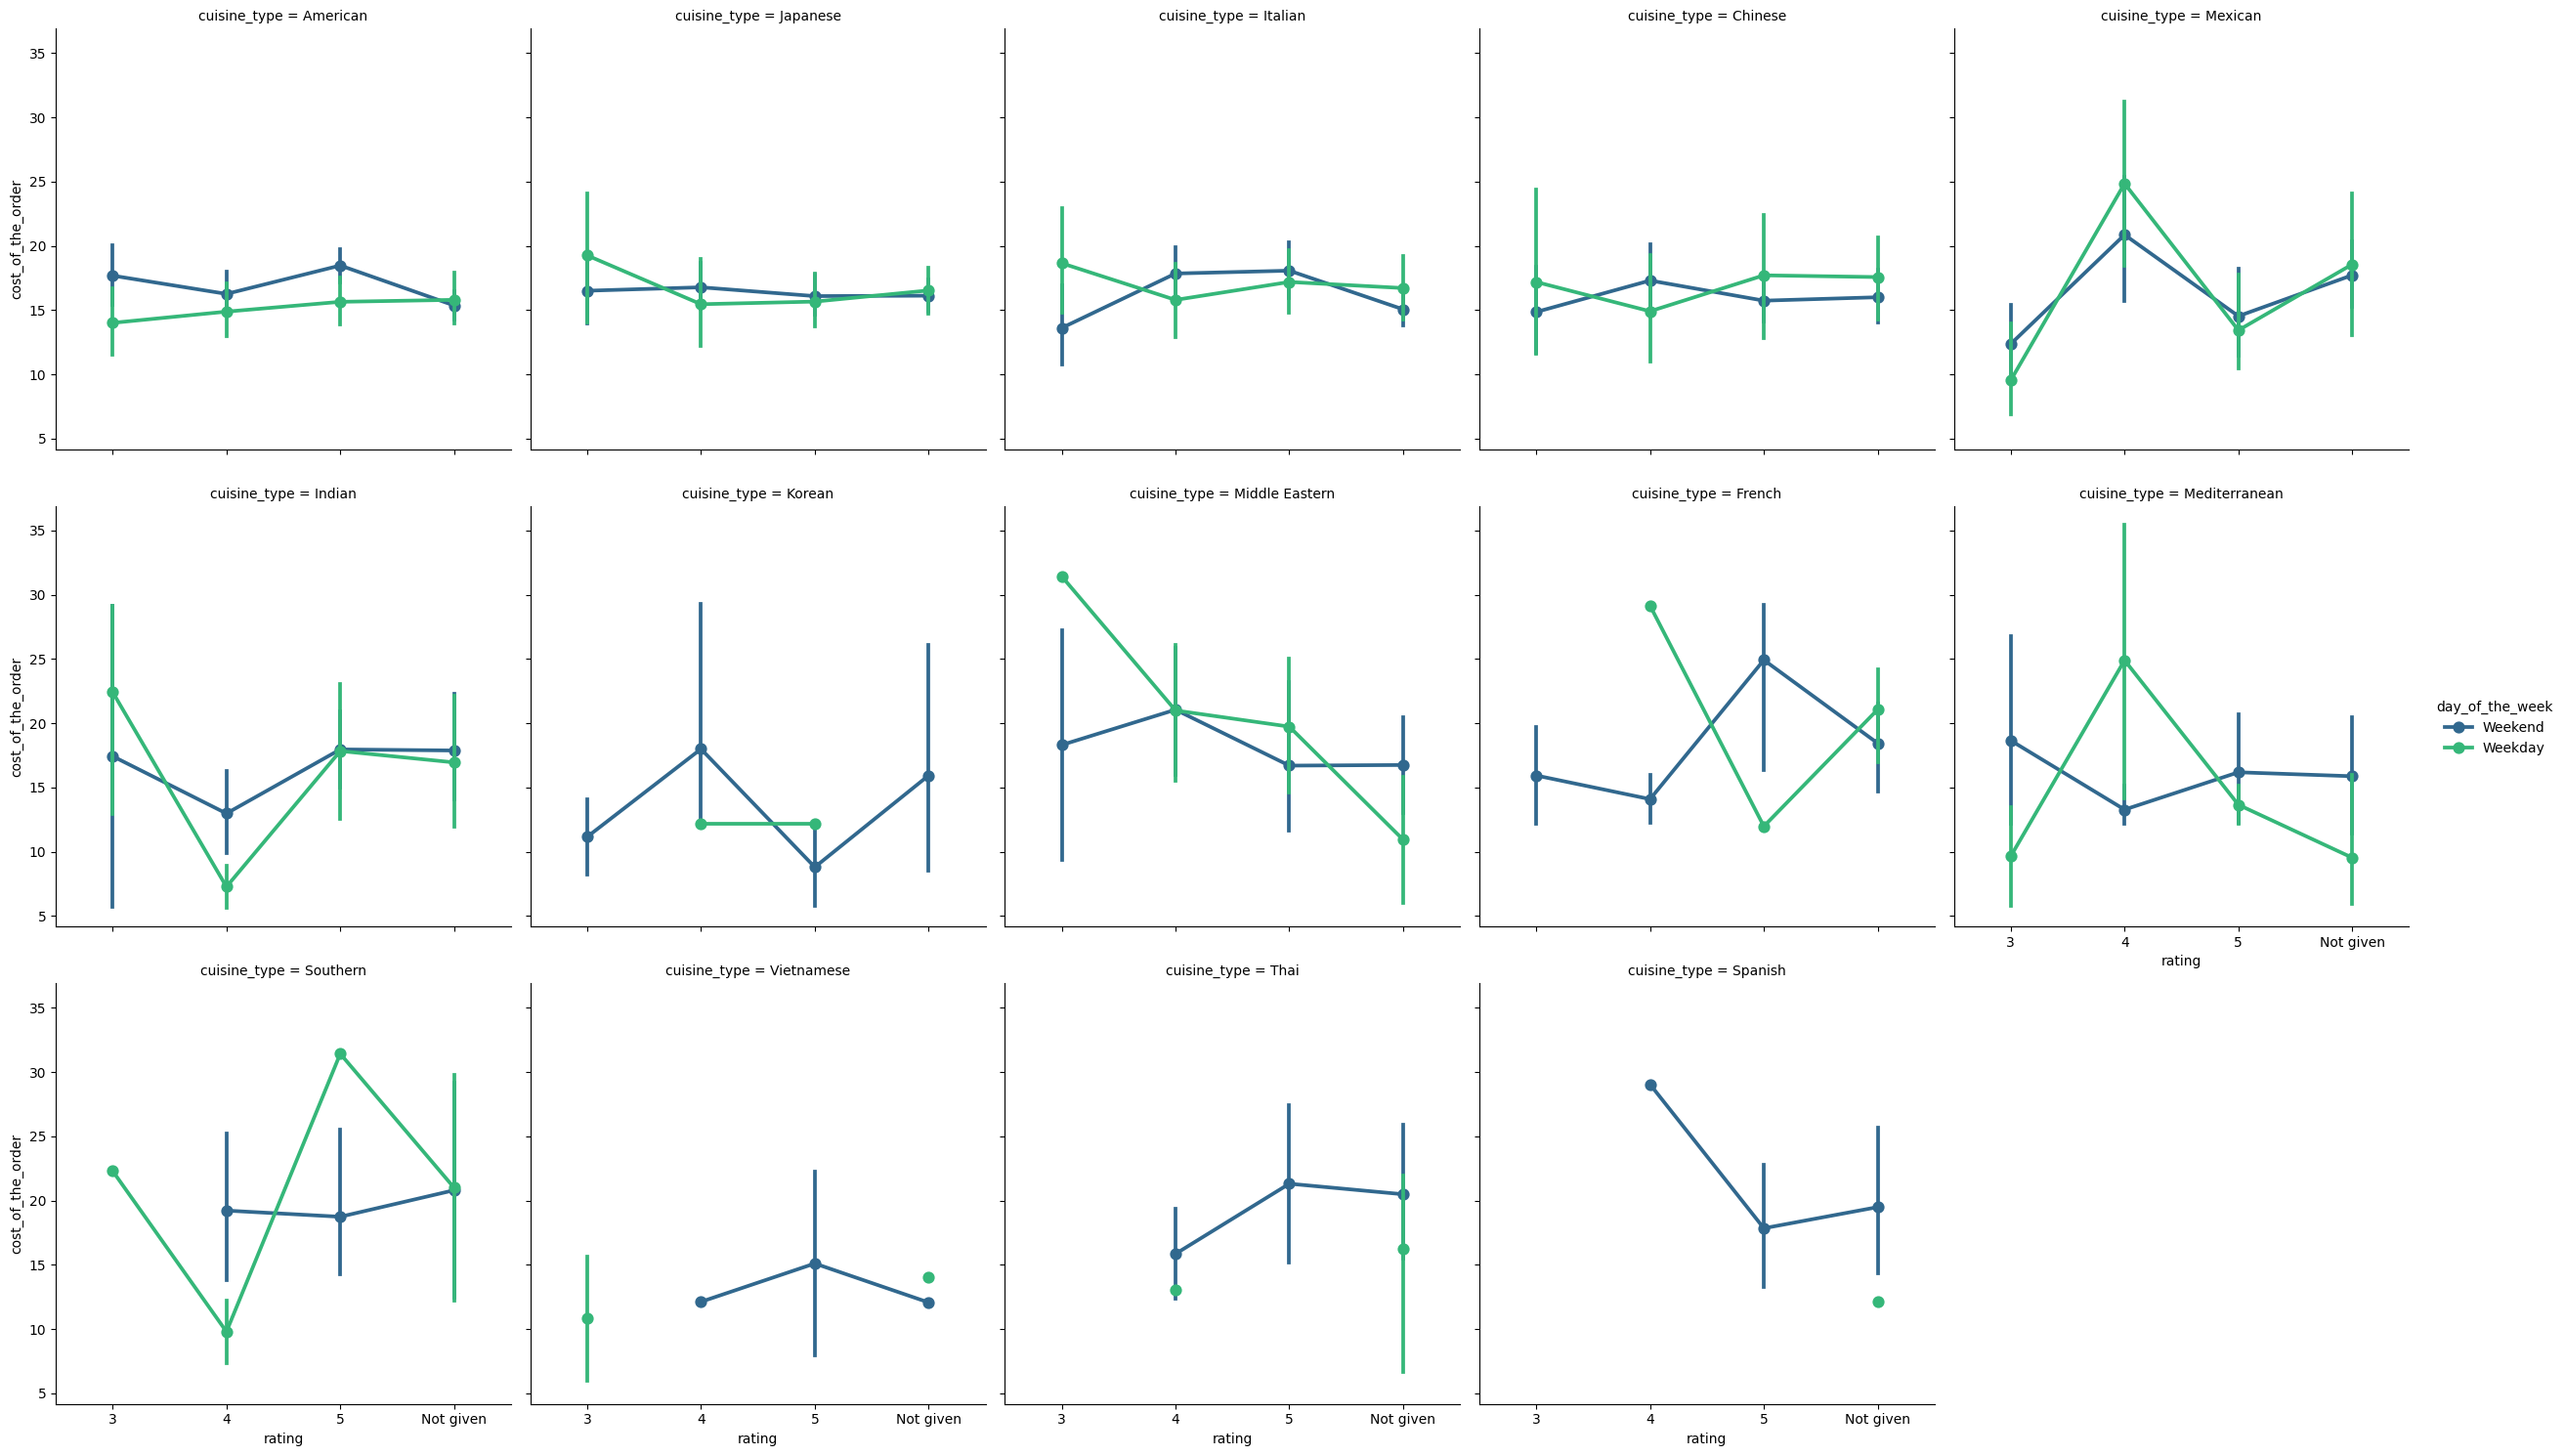

In [ ]:
# line plot for Cost of the order vs. Rating
plt.figure(figsize=(10, 7))
sns.lineplot(data=df_sorted,x= 'rating', y='cost_of_the_order',hue='day_of_the_week',palette='viridis',errorbar=('ci', False) );
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.title('Cost of the Order vs. Rating')

# point cat plot for Cost of the order vs. Ratitng break down by each cuisine type
sns.catplot(data=df_sorted,x= 'rating', y='cost_of_the_order', hue='day_of_the_week',col ='cuisine_type',kind='point',palette='viridis', col_wrap=5);

Observation 12.6.1


*  Overall for weekend orders, the ones that don't receive rating or receives low ratings tend to be in the lower cost range. weekday orders do not follow this pattern.
*  Overall for weekend orders, cost of order and rating show slight positive correlation, eg. higher cost orders tend to get higher rating, specific cuisines may not follow this pattern.
*  The cost of orders for the most popular cuisines are within a specific popular price range, while order cost for less popular cuisins tend to go up or down the range.

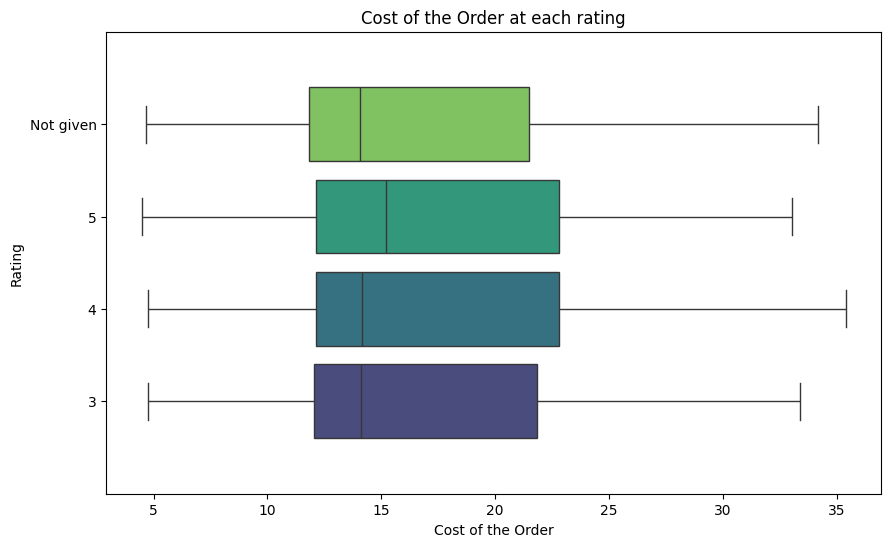

In [ ]:
#Box plot of Rating and Cost of the Order')
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_sorted, x='cost_of_the_order', y ='rating',hue='rating',palette='viridis');
plt.ylim(-1,4)
plt.xlabel('Cost of the Order')
plt.ylabel('Rating')
plt.title('Cost of the Order at each rating')
plt.show()

Observation 12.6.2

cost of order has slight positive impact on rating, overall, orders that are given 5-point rating cost a little more than those given 3 or 4 point ratings.

#### Revenue generated by restaurants

In [ ]:
#create new data frame of top revenue by restaurants
restaurant_revenue = foodhub_order.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).reset_index()
restaurant_revenue = restaurant_revenue.rename(columns={'cost_of_the_order': 'total_revenue'})
restaurant_revenue


,restaurant_name,total_revenue
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
...,...,...
173,Market Table,6.79
174,Wa Jeal,6.74
175,Big Wong Restaurant _¤¾Ñ¼,5.92
176,Cipriani Le Specialita,5.92


Observation 12.7.1

Revenues generated by each restaurants varies largely

<Axes: xlabel='total_revenue', ylabel='restaurant_name'>

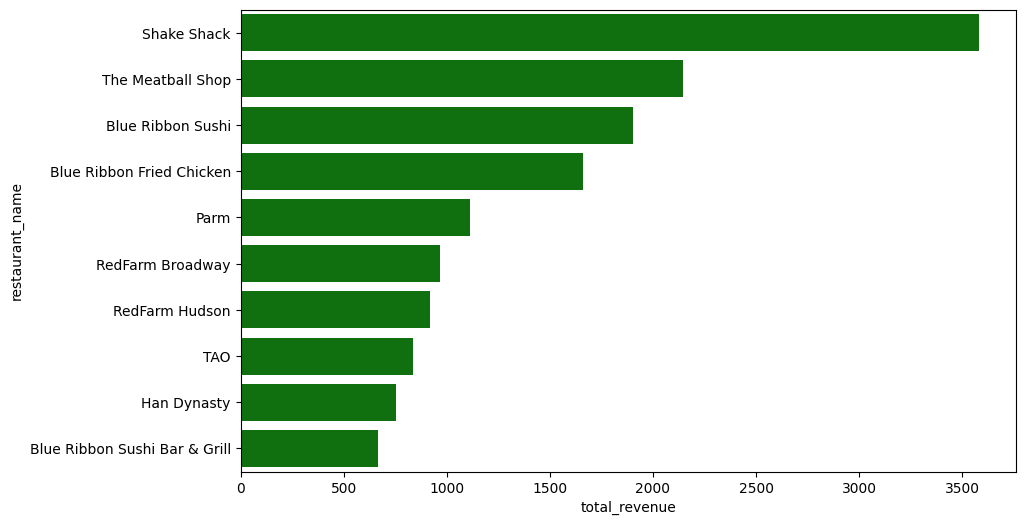

In [ ]:
# # bar plot of top revenue restaurants
plt.figure(figsize=(10, 6))
sns.barplot(data=restaurant_revenue.head(10), x='total_revenue', y='restaurant_name', color='green', orient='h')

Observation 12.7.2

Top 5 restaurants each generate $1000 or more revenue

#### Day of the week vs. rating

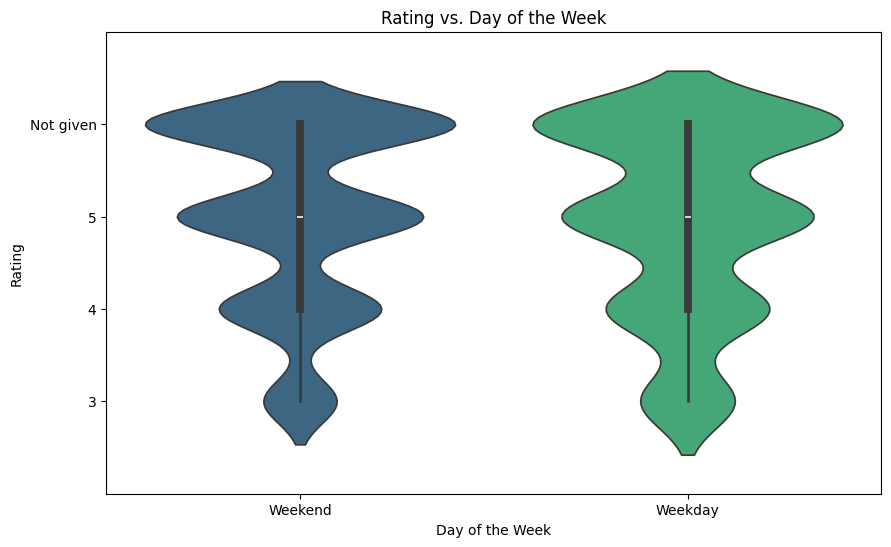

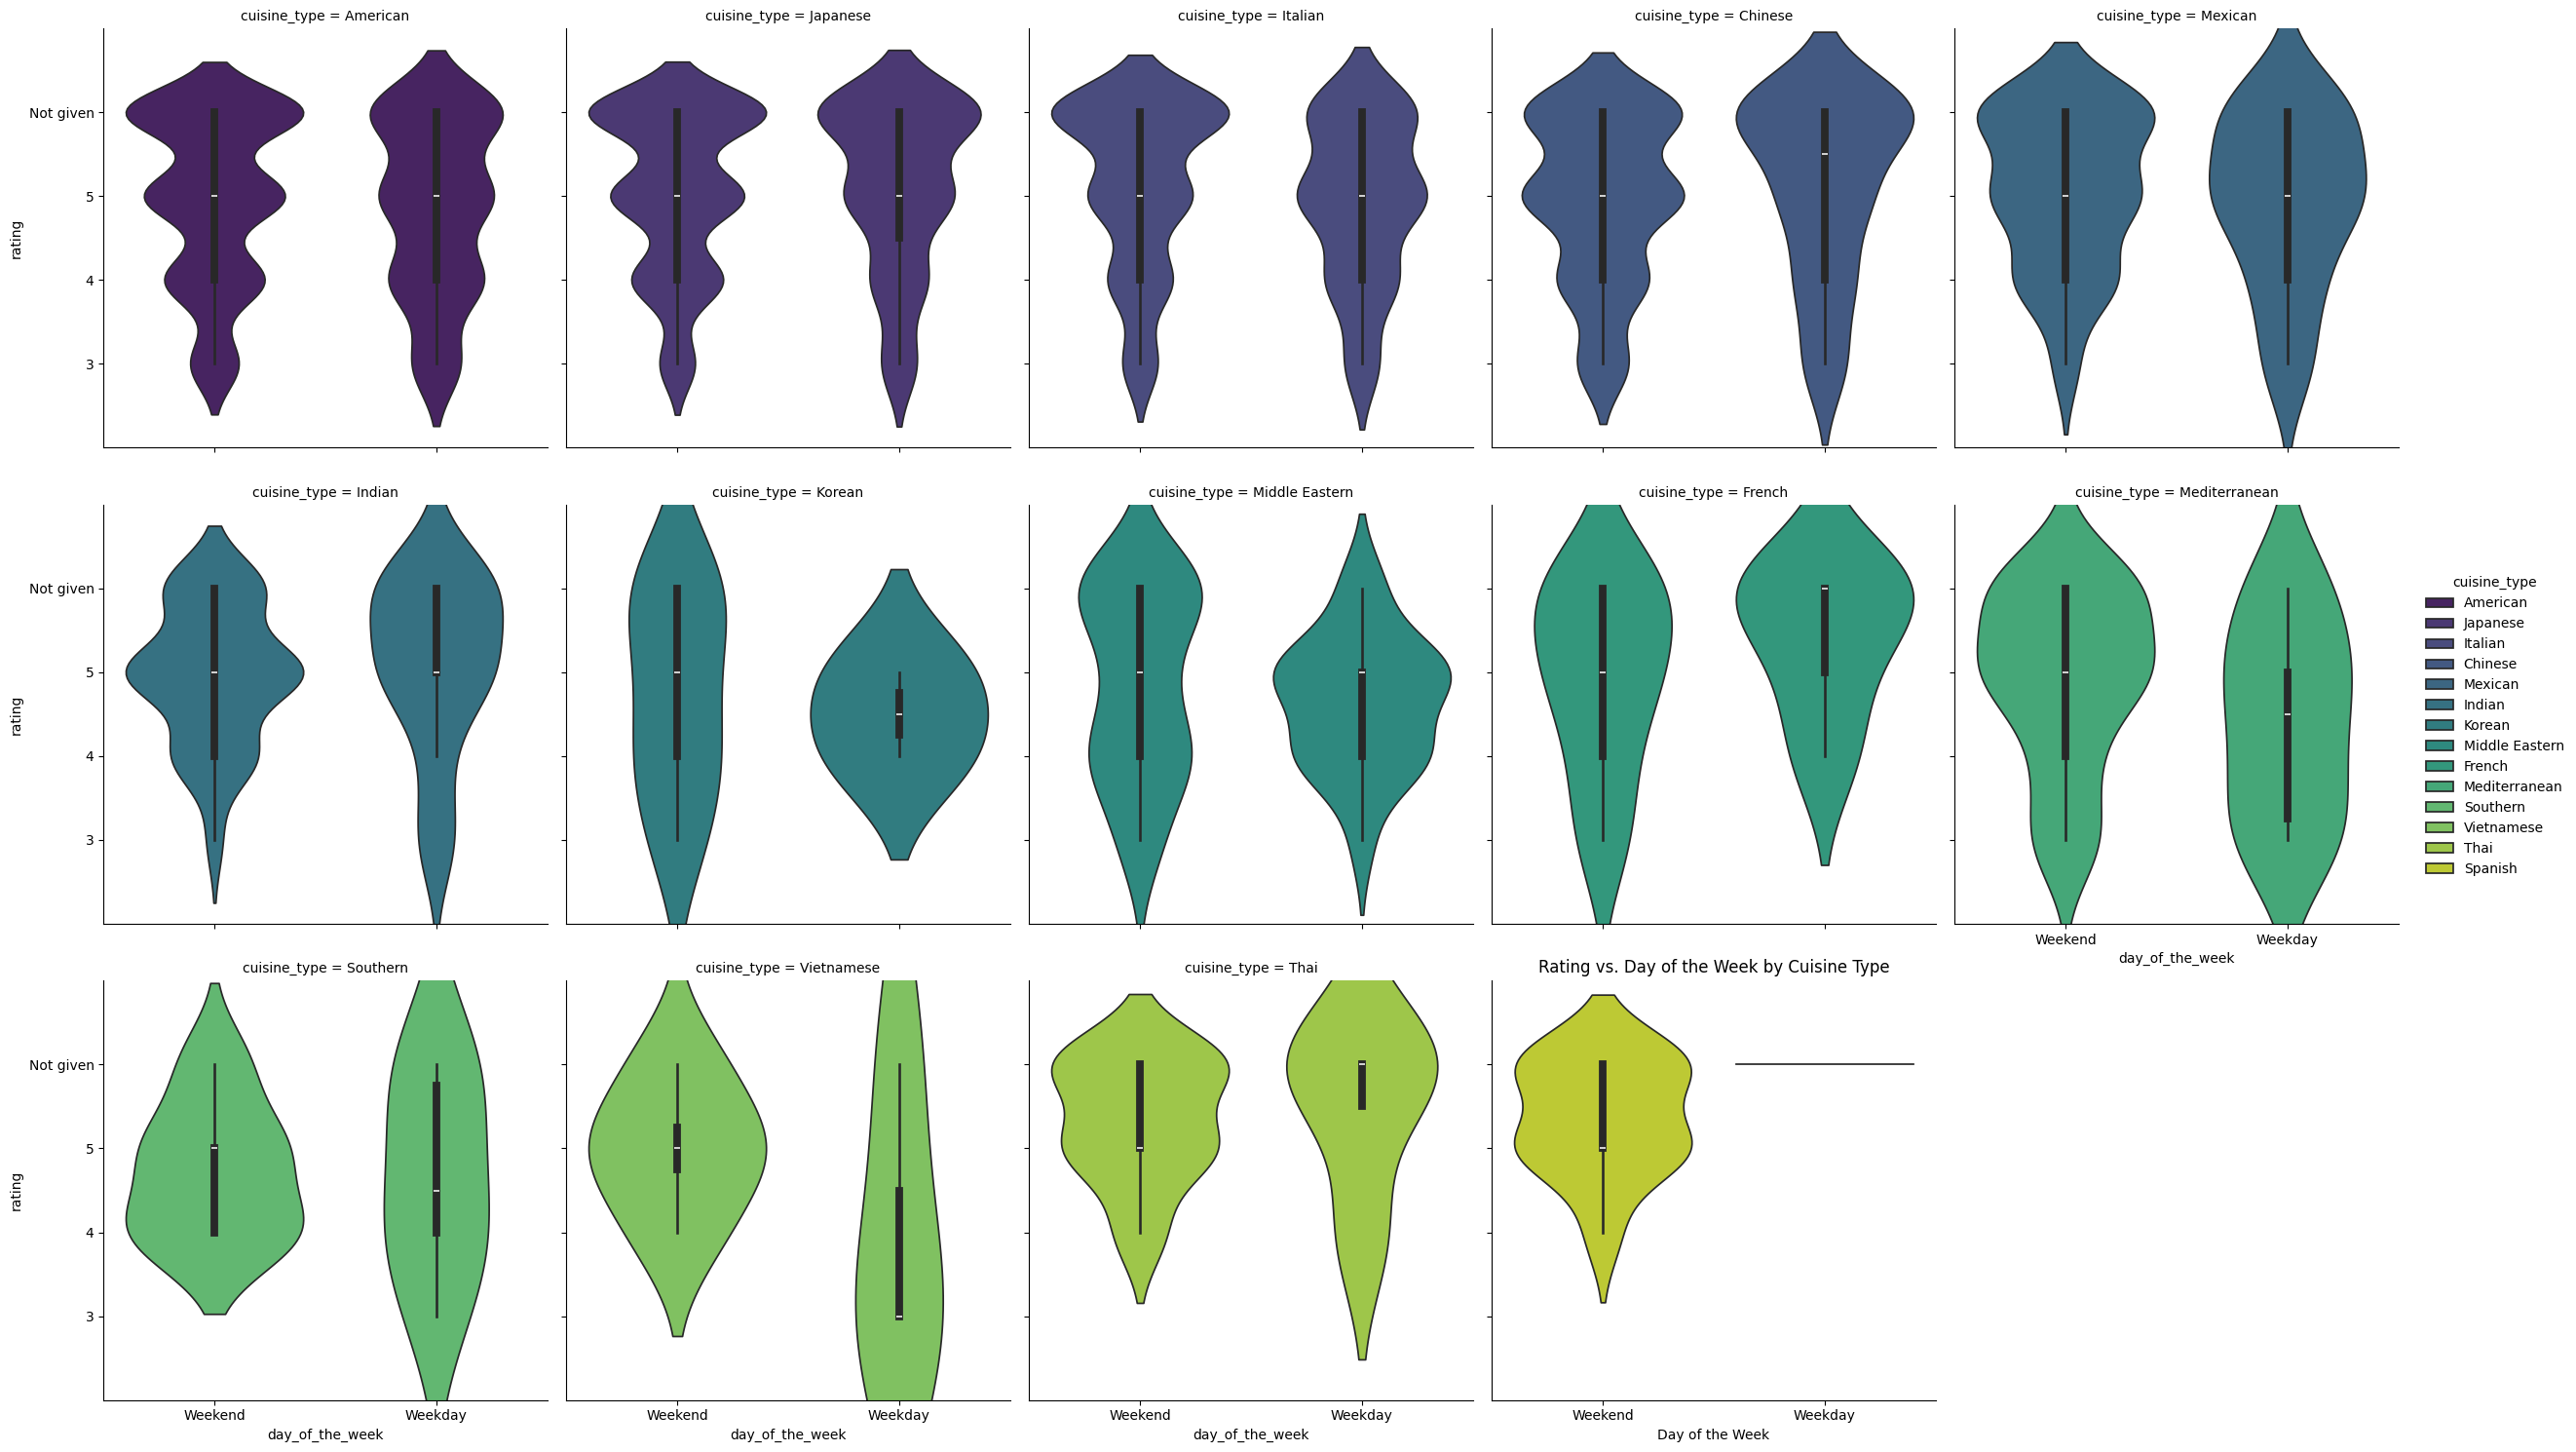

In [ ]:
#violin plot for day of the week vs. rating
plt.figure(figsize=(10,6));
#df_top_cuisines = df_sorted[df_sorted['cuisine_type'].isin(['American','Japanese','Italian','Chinese'])]

sns.violinplot(data=df_sorted,y='rating',x ='day_of_the_week',  hue= 'day_of_the_week', palette='viridis');
#plt.xticks(rotation=90);
plt.ylim(-1,4)
plt.xlabel('Day of the Week')
plt.ylabel('Rating')
plt.title('Rating vs. Day of the Week')
plt.show();

#violin cat plot for rating and day of the week break down by cuisine type
sns.catplot(data=df_sorted,y='rating',hue='cuisine_type',x ='day_of_the_week', kind='violin', col = 'cuisine_type',col_wrap=5,palette='viridis');
plt.ylim(-1,4)
plt.xlabel('Day of the Week')
plt.ylabel('Rating')
plt.title('Rating vs. Day of the Week by Cuisine Type')
plt.show();

Observation 12.8

*   Overal weekend and weekday orders show similar rating patterns, number of orders that do not receive rating are higher than 5, 4, or 3 ratings.  
*   specific to individaul cuisine, not all of them fit into this pattern, only American, Japanese, Chinese, and Thai restaurants confirm in the general pattern.

#### Rating vs. delivery time

In [18]:
# line plot for delivery time vs. Rating
plt.figure(figsize=(10, 7))
sns.lineplot(data=df_sorted,y='delivery_time', x='rating', errorbar=('ci',False), palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.title('Delivery Time vs. Rating')

# point cat plot. for ratitng vs. Delivery time break down by each cuisine type
sns.catplot(data=df_sorted,y='delivery_time',hue='day_of_the_week', x='rating', kind='point',  col='cuisine_type', col_wrap=5, palette='viridis');
plt.show()

NameError: name 'df_sorted' is not defined

<Figure size 1000x700 with 0 Axes>

Observaion 12.9.1

Generally, **weekday delivery time is longer than weekend** across all cuuisine types.

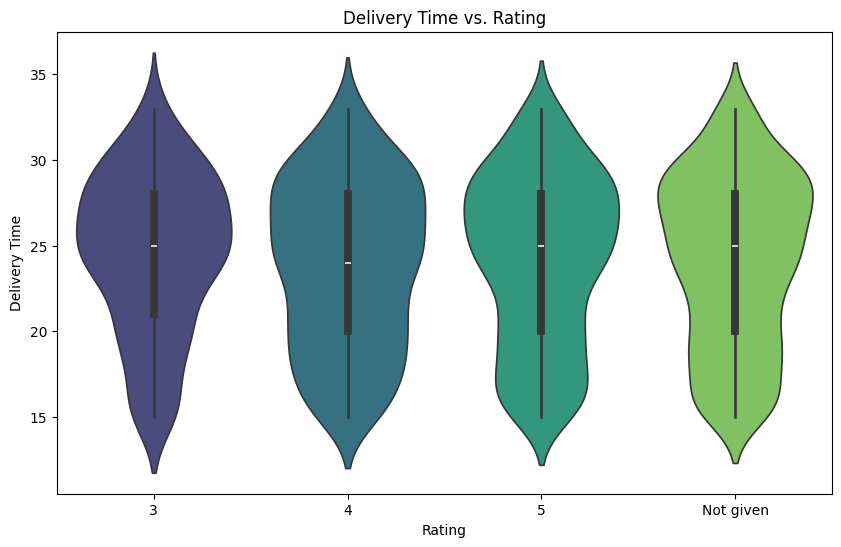

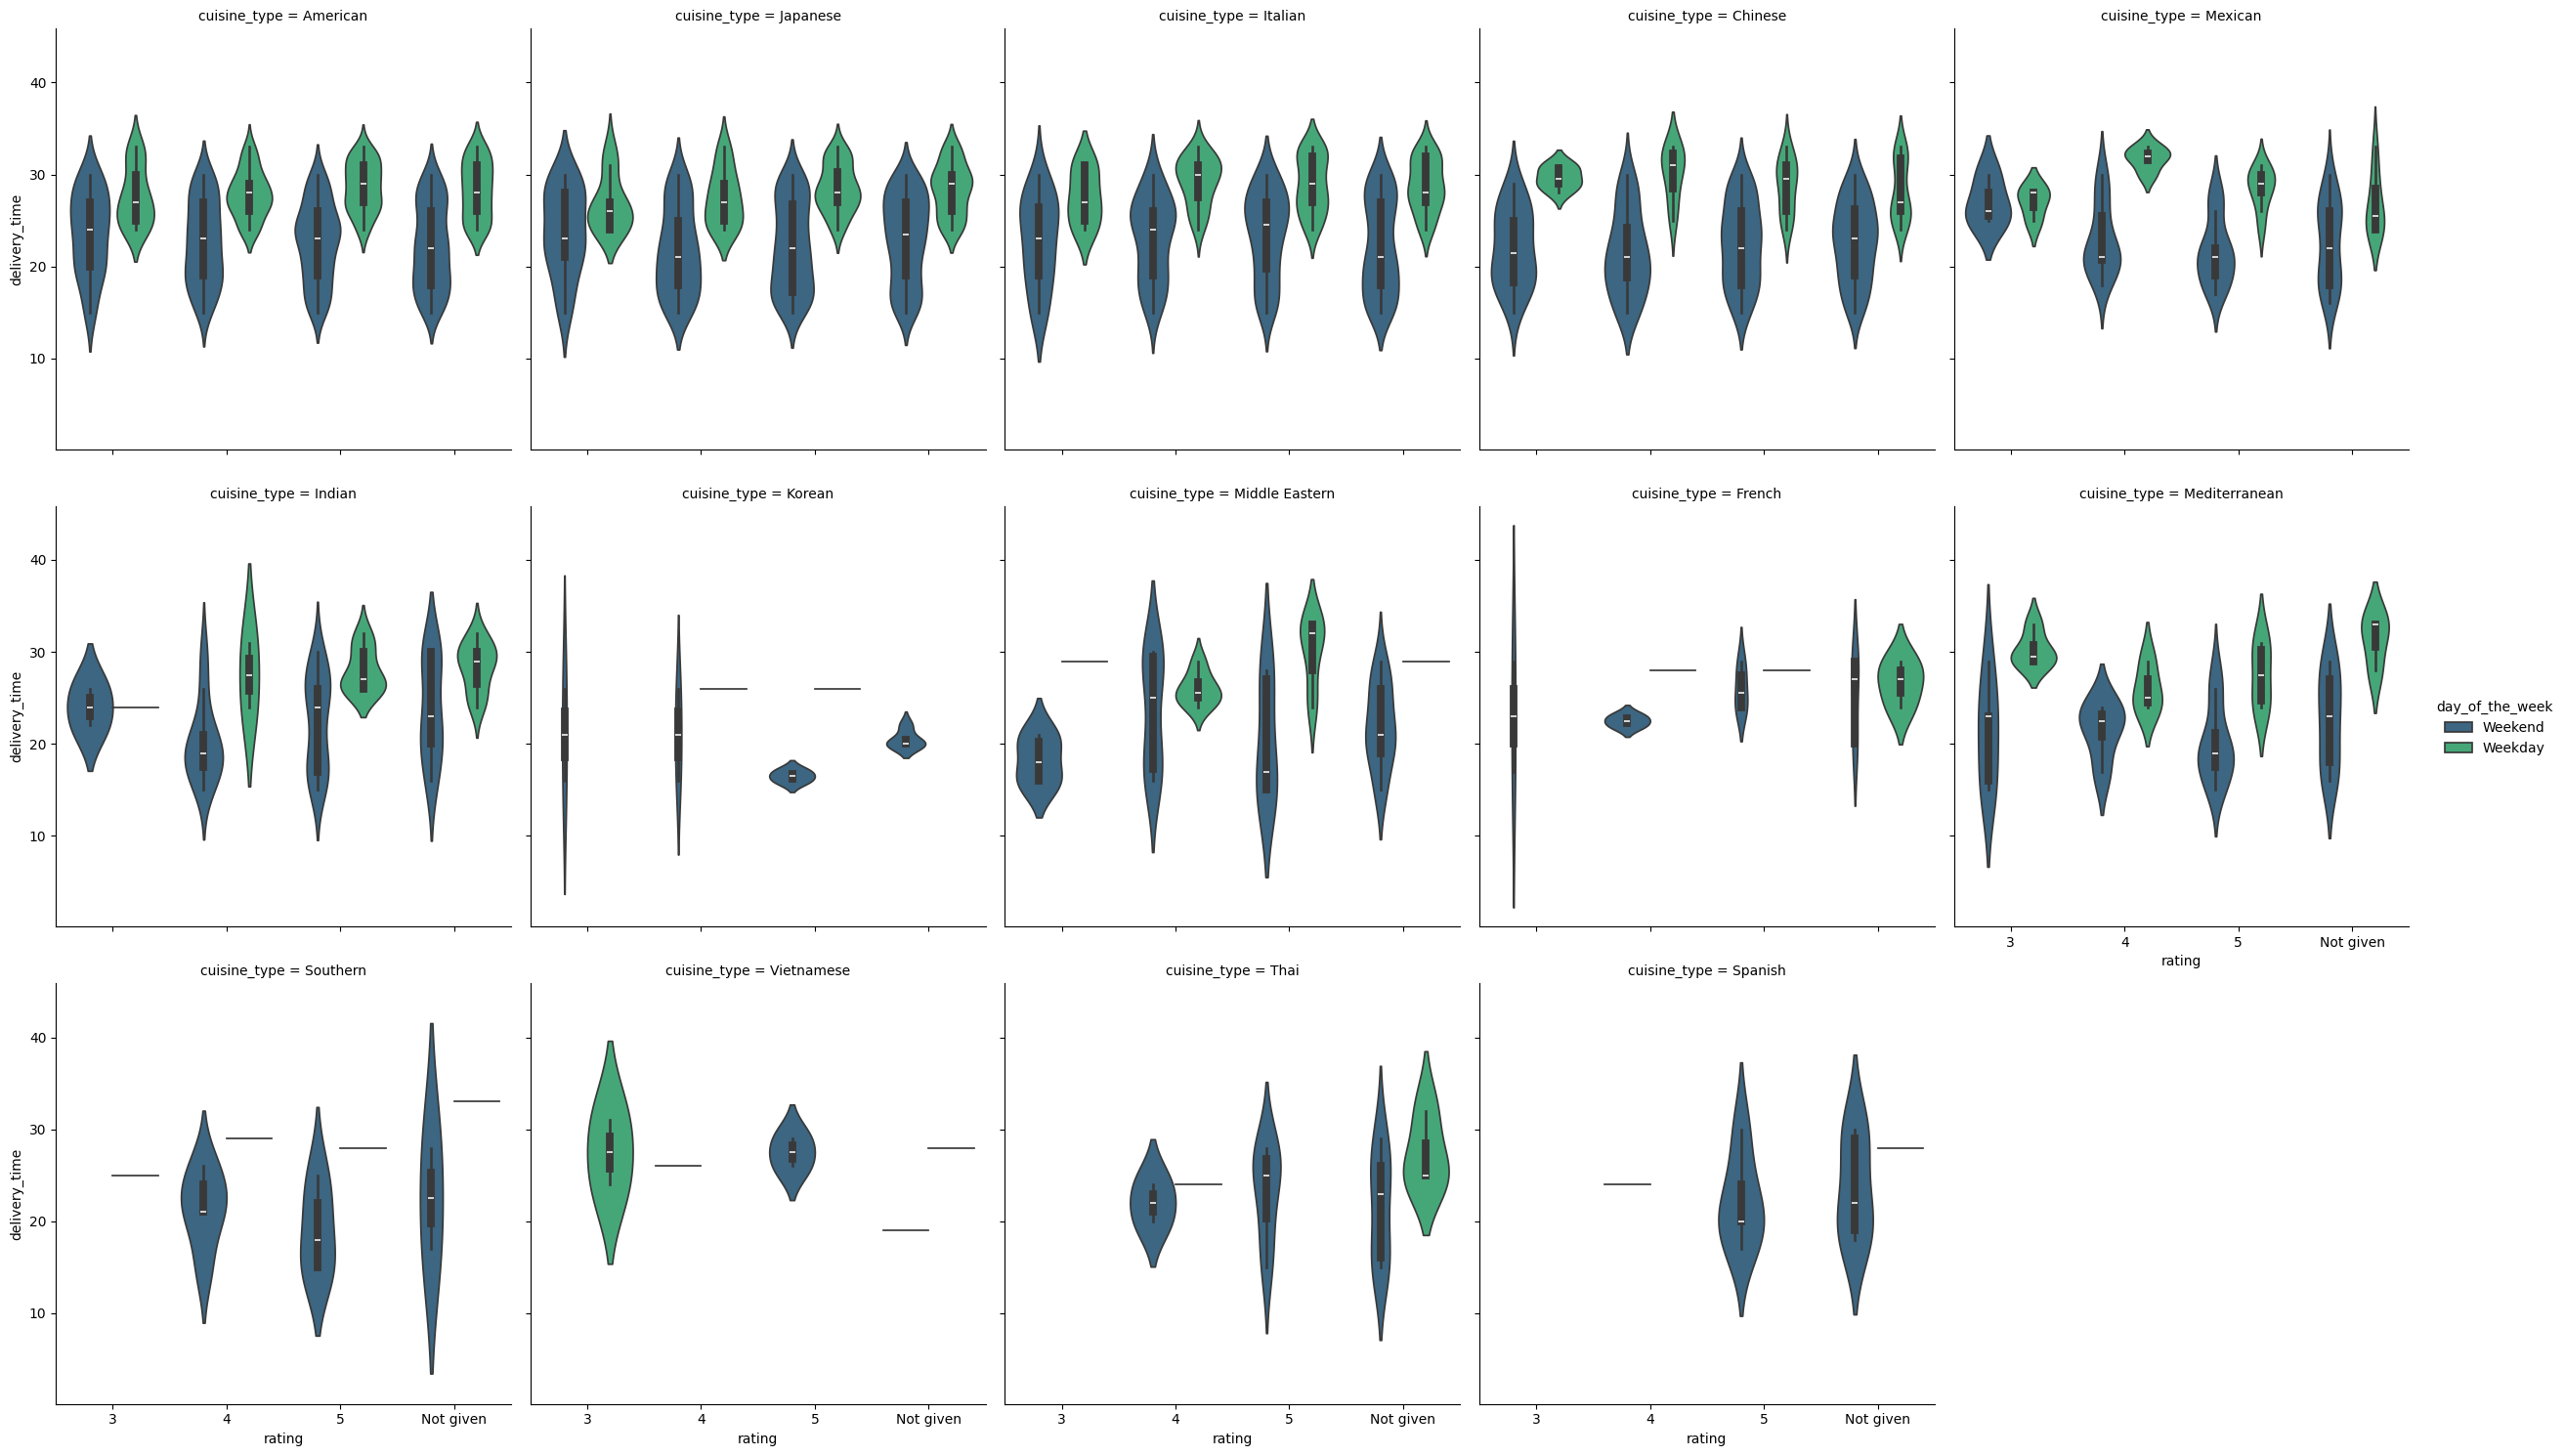

In [ ]:
# violin plot for delivery time vs. rating
plt.figure(figsize=(10,6))
sns.violinplot(data=df_sorted,y='delivery_time', x='rating', hue='rating',palette='viridis');
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.title('Delivery Time vs. Rating')
plt.show()

#violin cat plot for delivery time vs. rating brake down by cuisine type
sns.catplot(data=df_sorted,y='delivery_time', hue='day_of_the_week', x='rating', col ='cuisine_type', col_wrap= 5, kind='violin',palette='viridis');

Observaion 12.9.2

In general,

*   Orders that take **longer time to deliver** have a higher percentage of chance of **getting 3 point** low rating than those that take 20 minutes or less to deliver
*   Orders that take **shoter time to deliver** have a higher percentage of chance of **getting a 4 or 5** than those that takes longer than 25 minutes or more to deliver

#### Rating vs. food preparation time

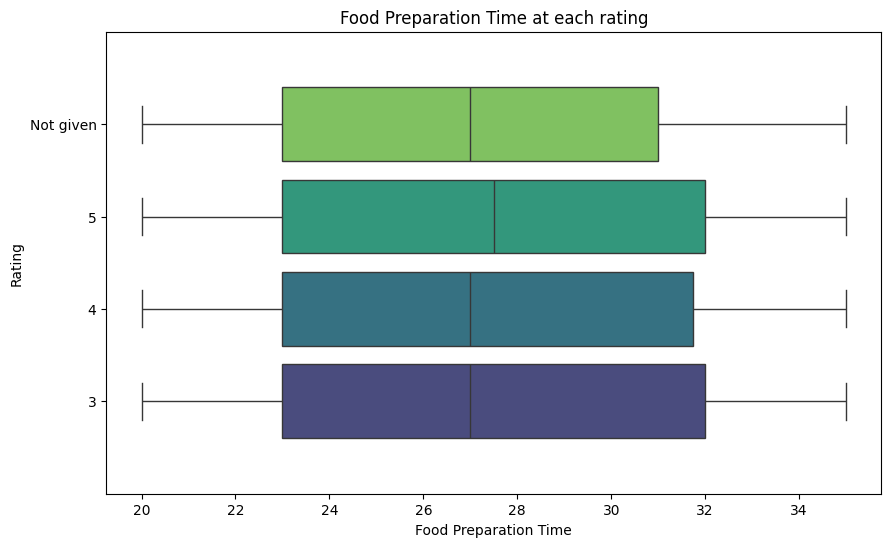

In [ ]:
# Scatter plot for rating vs. food preparation time
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_sorted, x='food_preparation_time', y ='rating', hue='rating',palette='viridis');
plt.ylim(-1,4)
plt.xlabel('Food Preparation Time')
plt.ylabel('Rating')
plt.title('Food Preparation Time at each rating')
plt.show()

Observaion 12.10

preparation time has slight positive impact on rating, orders that are given 5-point rating have sligtly longer preparation time than those given 3 or 4 point ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Prepare rating data
# Rating column has object data type, we need to tranform it to numeric in order to calculate average. Because 736 orders has the value of 'Not Given' in ratinbg,
# First, replace 'Not Given' values in the 'rating' column with null (NaN), or alternatively, you could drop those data
foodhub_order['rating'] = foodhub_order['rating'].replace('Not given', float('nan'))

#Second, convert rating to numerical data type, int
foodhub_order['rating'] = pd.to_numeric(foodhub_order['rating']).astype('Int64')

# Build a new data frame with only restaurant name, rating count, and average rating
rating_count_average = []
columns = ['restaurant_name', 'rating_count', 'average_rating']

#fill the data frame with data row by row
restaurants=foodhub_order['restaurant_name'].unique()

for i in restaurants:
  rating_count = foodhub_order[foodhub_order['restaurant_name']==i]['rating'].count()
  average_rating = foodhub_order[foodhub_order['restaurant_name']==i]['rating'].mean()
  rating_count_average.append(pd.DataFrame([[i, rating_count, average_rating]], columns=columns))

# print the result
rating_count_average = pd.concat(rating_count_average).reset_index(drop=True).sort_values(by='rating_count', ascending=False)
# rating_count_average.['rating_count']
rating_count_average

<ipython-input-7-e24d194248a5>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rating_count_average = pd.concat(rating_count_average).reset_index(drop=True).sort_values(by='rating_count', ascending=False)


,restaurant_name,rating_count,average_rating
14,Shake Shack,133,4.278195
6,The Meatball Shop,84,4.511905
17,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125
32,RedFarm Broadway,41,4.243902
...,...,...,...
167,Paul & Jimmy's,0,NaN
172,Le Zie 2000 Trattoria,0,NaN
171,Wa Jeal,0,NaN
170,Emporio,0,NaN


In [ ]:
# Calculate the top restaurants that have a rating count of more than 50 and the average rating greater than 4
restaurant_promo=rating_count_average[(rating_count_average['rating_count']>50) & (rating_count_average['average_rating']>4)]
restaurant_promo

,restaurant_name,rating_count,average_rating
14,Shake Shack,133,4.278195
6,The Meatball Shop,84,4.511905
17,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


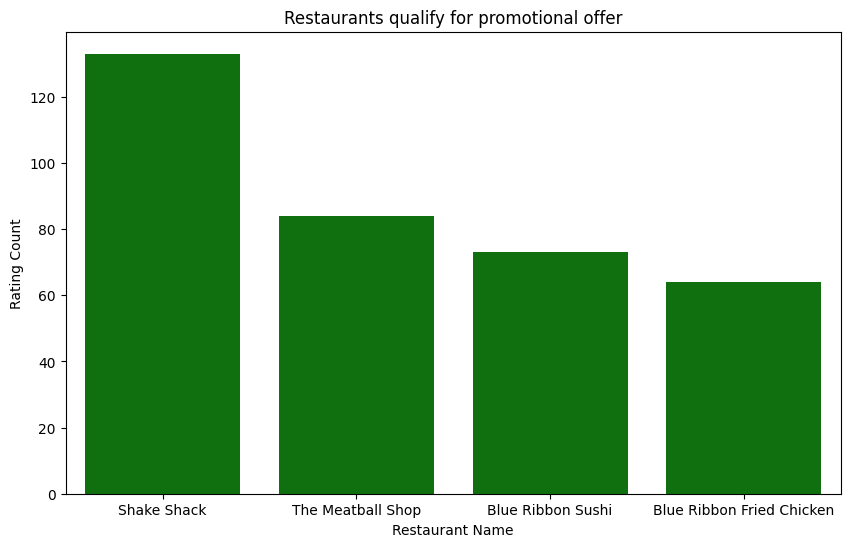

In [ ]:
# generate bar graph of top restraunts
plt.figure(figsize=(10, 6))
sns.barplot(data=restaurant_promo, x='restaurant_name', y='rating_count',color='green')
# plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Rating Count')
plt.title('Restaurants qualify for promotional offer')
plt.show()

#### Observations:
**Four restaurants that meet the condition** for promotional offer:

* Blue Ribbon Fried Chicken
* The Meatball Shop
* Shake Shack
* Blue Ribbon Sushi



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# function to determine the revenue
def net_revenue(order_cost):
    if order_cost > 20:
        return order_cost*0.25
    elif order_cost > 5:
        return order_cost*0.15
    else:
        return order_cost*0

# create a new column in dataframe for revenue and fill data
foodhub_order['revenue'] = foodhub_order['cost_of_the_order'].apply(net_revenue)
foodhub_order.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,<NA>,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,<NA>,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = foodhub_order['revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
The foodhub company generated **$6166.30 net revenue** across all orders

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# create a new column for total_time in dataframe
foodhub_order['total_time'] = foodhub_order['food_preparation_time']+foodhub_order['delivery_time']

over_60 = foodhub_order[foodhub_order['total_time']>60]
over_60_percent = over_60.shape[0]/foodhub_order.shape[0]*100

#alternative way: must specify 'total time' column, if use entire dataframe, it will not count rows with no rating
# over_60_percent = over_60['total_time'].value_counts().sum()/foodhub_order.shape[0]*100

print('percent of orders takes more than 60 min:', format(over_60_percent, '.2f'), '%')

percent of orders takes more than 60 min: 10.54 %


#### Observations:
**10.54% of orders take more than 60 minutes** to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
foodhub_order.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [20]:
weekday = foodhub_order[foodhub_order['day_of_the_week']=='Weekday']['delivery_time'].mean()
weekend = foodhub_order[foodhub_order['day_of_the_week']=='Weekend']['delivery_time'].mean()
difference = weekday-weekend

print('difference:', round(difference))

difference: 6


#### Observations:
The mean dilevery time during weekdays is about **6 minutes longer** than weekends


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1.  **Cuisine type**: More than 80% of orders are from these top four cuisines:
  *  American
  *  Japanese
  *  Italian
  *  Chinese

2. **Delivery time & Rating**: There appear to be slight negative correlation between rating and delivery time, suggesting that in general,
  *  Orders that take 25 minutes or more time to deliver have a higher percentage of chance of getting 3 point low rating than  those that take 20 minutes or less to deliver
  *  Orders that take 20 minutes or. shoter time to deliver have a higher percentage of chance of getting a 4 or 5 rating than those that takes longer than 25 minutes or more to deliver

3. **Cost & Rating**: Overall, there is slight positive correlation between cost of weekend Orders and ratings,suggesting that in general,
  * Lower-cost weekend orders tend to receive lower ratings or no ratings.
  * While higher-cost weekendorders tend to get better ratings

4. Overall, there appear to be **slight positive correlation between rating and cost_of_the_order and preparation time**, suggesting that orders given 5 rating tend to have higher cost and longer preparation time.

2. **More than 70% of orders are on weekends,** and averege weekend delivery time is 6 minutes shorter than weekdays.

5. **38.78% of the rating column has missing values** "Not Given", this significantly reduces data volume for rating data related analysis

6. **Popularity vs. Price Range & and delivery time range**: Top Cuisines show steady delivery time range and similar cost range, while other cuisine restaurants vary. This may be due to the data volume of other cuisine restaurants have fewer orders in the data set. May need more data to confirm, then can advice non popular restaurants take price adjustment to the middle rage

### Recommendations:

1. **Ensure Deliver Resource Allocaion for Top Market Demand**
  * Prioritize delivery resources for the **top four cuisines (American, Japanese, Italian, and Chinese)** to maintain business stabillity and drive growth
  * Continue optimizing **weekend delivery routes and resources** to meet peak demand
  * Identify the causes fo **slower weekday delivery times** and implement improvements to enhance overall efficiency and ratings

2. **Leverage Fast Delivery as a Competitive Advantage**
  * Promote cuisines with **shorter delivery times (Korean, Thai, Southern)** through marketing campaigns (e.g., “Fast & Fresh: Get Your Order in Under X Minutes!”).
  * Offer ***priority delivery slots*** or a “speed guarantee” for these restaurants to attract more customers.

3. **Improve Delivery Logistics for Slow Cuisines**
  * Identify restaurants with **long delivery times** and explore solutions such as dedicated **delivery zones, route optimization, or additional driver availability.**

4. **Improve Customer Satisfaction & Ratings**
  * **Analyze restaurants with lower average ratings** to identify potential areas for improvement (e.g. food quality, packaging, delivery speed)
5. **Maximize Revenue Potential Through Premium Offerings**
  * Since **higher-cost orders tend to receive better ratings on weekends**, collaborate with restaurants to promote premium meal bundles or add-ons.
  * Implement **AI-driven recommendations** to suggest higher-value items based on order history
6. **Enhance Rating Data quality for deeper insights**. This could involve
  * **Employing imputation techniques** to handle missing rating data
  * **Exploring new strategies to improve rating submissions**, such as offering incentives for customer feedback and collecting more detailed reponses beyond single numerical ratings.
7. **Further analyze company revenue impact factors to optimize profit**
  * Conduct deeper analysis into how company revenue is impacted by cuisine type, restaurant selection, delivery time, and ratings
  * Find out more about the top contributing restaurants and reward them with
  * Adjust pricing stragegiesand margin brackets based on insights from company revenue trends.


